# Creazione del file il 29 Marzo
Questo codice analizza gli embeddings prodotti da infograph in maniera separata per miur e Italian journal of medicine con la spearanza che in tal maniera la dimensione dei grafi non sia piu un problema cosi importante (visto che nella stessa source ci sono documenti di lunghezza simile). Inoltre osservo che i documenti sono relativi solo al layer 3, (vedi osservazione quaderno 29 marzo). Questo codice prende ispirazione (molti copia incolla da InfoGraphembeddingsLunghezza source)

In [1]:
import json
import pandas as pd
import os
from tqdm.notebook import tqdm
import xml.etree.ElementTree as ET
import requests
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE

Importo i file pickle relativi agli embedding di InfoGraph

Osservo che non rimuovo i documenti senza annotations perchè probabilmente UMLS e le annotazioni in generale non saranno utili. QUindi layer 1 ha 86 documenti.

In [2]:
with open('FilePickles\Embedding3_InfoGraphTRANSDUCTIVEhidden_dim32num_gc_layers3lr0.01ItalianJournalofMedicine.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb_ItalianJournal = pickle.load(file)
with open('FilePickles\Embedding3_InfoGraphTRANSDUCTIVEhidden_dim32num_gc_layers3lr0.01Miur.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb_Miur = pickle.load(file)

In [3]:
print(len(emb_ItalianJournal),len(emb_Miur))

534 1439


C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


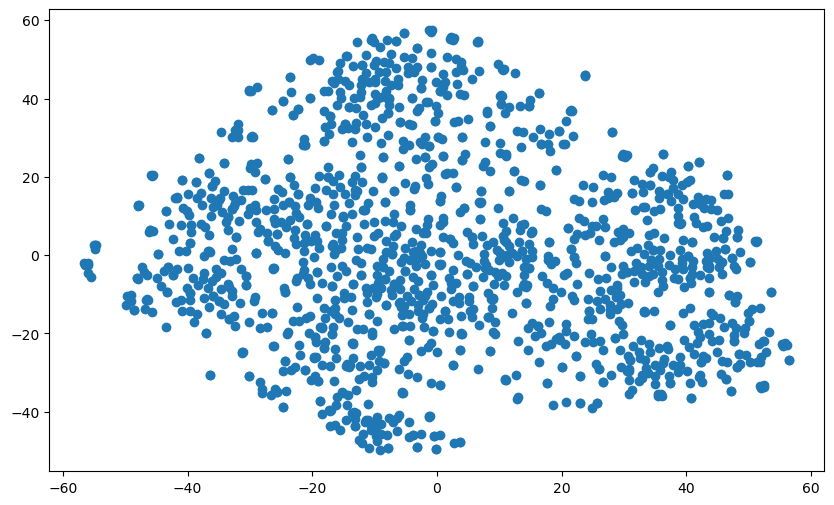

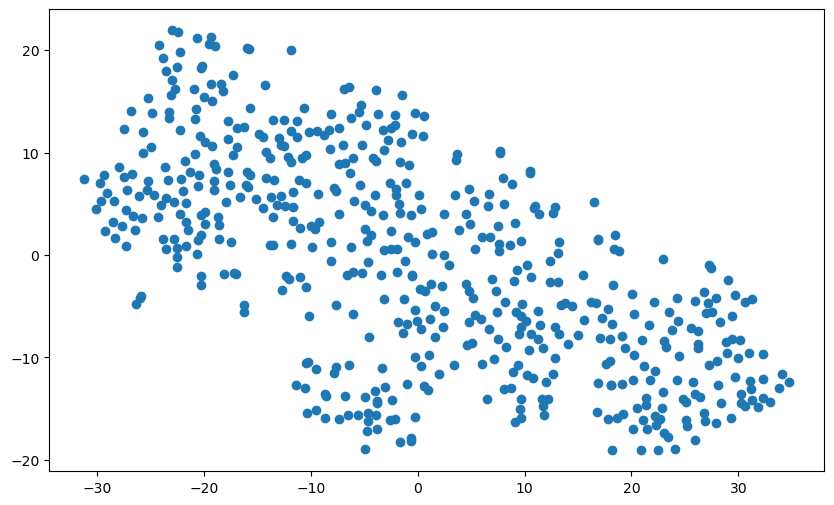

In [4]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne_Miur = tsne.fit_transform(emb_Miur)  # embeddings è la tua matrice di embedding

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne_ItalianJournal = tsne.fit_transform(emb_ItalianJournal)  # embeddings è la tua matrice di embedding

plt.figure(figsize=(10, 6))
plt.scatter(embeddings_tsne_Miur[:, 0], embeddings_tsne_Miur[:, 1])
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(embeddings_tsne_ItalianJournal[:, 0], embeddings_tsne_ItalianJournal[:, 1])
plt.show()


# Vediamo se la lunghezza gioca ancora un ruolo importante...
Nb: usisamo la dimensione delle matrici di adiacenza per vedere questo parametro!

In [5]:
with open('FilePickles\datasetGrafi_NO_ripetizioniItalianJournalofMedicinelayer3.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    datasetgrafi_ItalianJournal = pickle.load(file)
with open('FilePickles\datasetGrafi_NO_ripetizioniMiurlayer3.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    datasetgrafi_Miur = pickle.load(file)

In [6]:
len(datasetgrafi_Miur[0].x)

12

In [26]:
colorvecLunghezzaMiur = []
vecLunghezzaMiur = []


for datasetgrafo_Miur in datasetgrafi_Miur:
    vecLunghezzaMiur.append(len(datasetgrafo_Miur.x))

    if len(datasetgrafo_Miur.x) <15: 
        colorvecLunghezzaMiur.append(0)#BLUE
    if len(datasetgrafo_Miur.x)>=15:
        colorvecLunghezzaMiur.append(1) #RED

In [27]:
colorvecLunghezzaItalianJournal = []
vecLunghezzaItalianJournal = []


for datasetgrafo_ItalianJournal in datasetgrafi_ItalianJournal:
    vecLunghezzaItalianJournal.append(len(datasetgrafo_ItalianJournal.x))

    if len(datasetgrafo_ItalianJournal.x) <100: 
        colorvecLunghezzaItalianJournal.append(0)#BLUE
    if len(datasetgrafo_ItalianJournal.x)>=100:
        colorvecLunghezzaItalianJournal.append(1) #RED

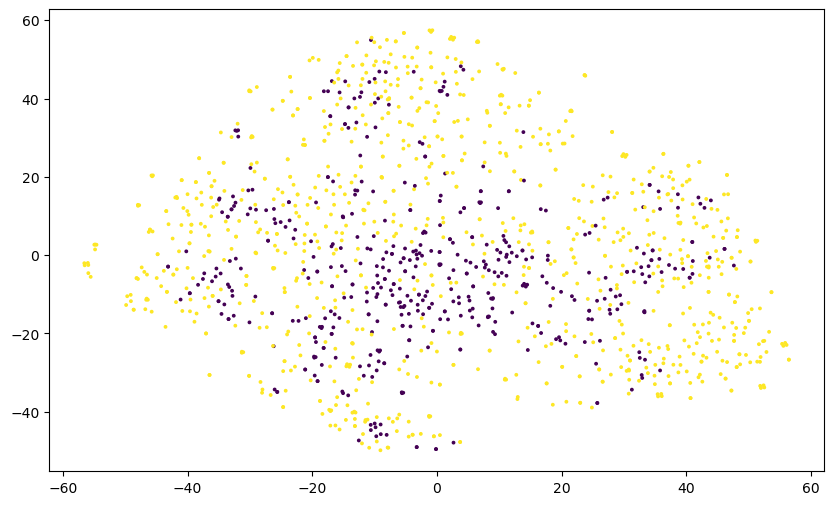

In [9]:
plt.figure(figsize=(10, 6))

plt.scatter(embeddings_tsne_Miur[:, 0], embeddings_tsne_Miur[:, 1], c=colorvecLunghezzaMiur, s= 3)

plt.show()

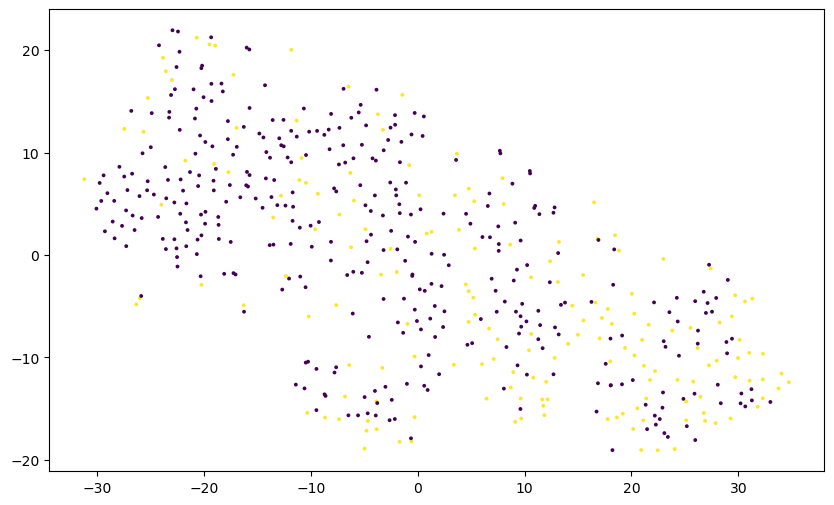

In [10]:
plt.figure(figsize=(10, 6))

plt.scatter(embeddings_tsne_ItalianJournal[:, 0], embeddings_tsne_ItalianJournal[:, 1], c=colorvecLunghezzaItalianJournal, s= 3)

plt.show()

In [11]:
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer3"

lista_testiMiur = []
lista_sourceMiur = []

lista_testiItalianJournal = []
lista_sourceItalianJournal = []

for filename in os.listdir(cartella):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                # Estrai il testo dal campo "text" se presente
                if "text" in data:
                    testo = data["text"]
                if "source" in data:
                    source = data["source"]
                if source == 'Miur':
                    lista_sourceMiur.append(source)
                    lista_testiMiur.append(testo)
                if source == 'Italian Journal of Medicine':
                    lista_sourceItalianJournal.append(source)
                    lista_testiItalianJournal.append(testo)

                        
            except Exception as e:
                pass

# ItalianJournal

In [67]:
import pandas as pd

dfItalianJournal = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
dfItalianJournal['Index'] = list(range(len(lista_sourceItalianJournal)))
dfItalianJournal['Text'] = lista_testiItalianJournal
dfItalianJournal['Length'] = [len(text) for text in dfItalianJournal['Text']]
dfItalianJournal['Source'] = lista_sourceItalianJournal
dfItalianJournal['ColorvecLunghezza'] = colorvecLunghezzaItalianJournal
dfItalianJournal['EmbeddingsTsneDim0'] = embeddings_tsne_ItalianJournal[:,0]
dfItalianJournal['EmbeddingsTsneDim1'] = embeddings_tsne_ItalianJournal[:,1]
dfItalianJournal['NumeroNodiGrafo'] = vecLunghezzaItalianJournal

In [68]:
vecLunghezzaItalianJournal

[114,
 104,
 96,
 94,
 121,
 107,
 69,
 97,
 99,
 109,
 91,
 111,
 86,
 104,
 122,
 106,
 104,
 116,
 120,
 125,
 125,
 128,
 111,
 109,
 91,
 125,
 110,
 125,
 121,
 105,
 121,
 129,
 120,
 104,
 97,
 102,
 103,
 117,
 91,
 89,
 108,
 109,
 112,
 90,
 48,
 55,
 87,
 88,
 81,
 105,
 97,
 95,
 83,
 98,
 43,
 105,
 96,
 45,
 105,
 48,
 103,
 126,
 109,
 119,
 59,
 112,
 84,
 93,
 71,
 126,
 80,
 84,
 98,
 77,
 78,
 79,
 111,
 129,
 80,
 98,
 78,
 92,
 77,
 91,
 77,
 86,
 77,
 77,
 98,
 75,
 143,
 118,
 109,
 69,
 81,
 110,
 80,
 100,
 70,
 46,
 79,
 107,
 69,
 96,
 105,
 79,
 102,
 85,
 108,
 94,
 99,
 112,
 116,
 104,
 81,
 97,
 109,
 79,
 64,
 84,
 85,
 78,
 92,
 69,
 105,
 78,
 105,
 84,
 86,
 91,
 102,
 102,
 112,
 110,
 115,
 115,
 125,
 73,
 77,
 105,
 103,
 75,
 50,
 85,
 98,
 87,
 81,
 74,
 84,
 199,
 94,
 79,
 46,
 99,
 77,
 100,
 123,
 104,
 36,
 84,
 209,
 72,
 115,
 81,
 80,
 94,
 189,
 68,
 76,
 123,
 78,
 54,
 39,
 99,
 86,
 114,
 115,
 131,
 122,
 129,
 88,
 92,
 79,
 92,


In [69]:
len(dfItalianJournal['Text'].unique())

534

In [70]:
len(dfItalianJournal)

534

In [72]:
dfItalianJournal

Index                                               Text  Length  \
0        0  G.R. 27 aa. Da 40 gg dolore, edema ginocchio s...    1447   
1        1  S.R., ♀di 69 aa, giunge alla nostra osservazio...    1242   
2        2  Paziente di anni 32, nigeriano, da 4 anni in I...    1375   
3        3  Paziente di sesso femminile, di anni 80, giung...    1468   
4        4  Un paziente di 77 aa, dimesso dopo impianto di...    1473   
..     ...                                                ...     ...   
529    529  Donna 82 anni, autonoma fino a qualche settima...    1066   
530    530  Donna di 30 anni, accede in Pronto Soccorso pe...     908   
531    531  È stata ricoverata in stato di insufficienza m...    1308   
532    532  donna, 68 aa, giunge per dispnea in associazio...    1023   
533    533  Donna di 80 aa, giunge per prurito in terapia ...    1165   

                          Source  ColorvecLunghezza  EmbeddingsTsneDim0  \
0    Italian Journal of Medicine                  1           -3.423157   
1    Italian Journal of Medicine                  1          -11.309746   
2    Italian Journal of Medicine                  0           27.256483   
3    Italian Journal of Medicine                  0           18.220924   
4    Italian Journal of Medicine                  1           -6.392161   
..                           ...                ...                 ...   
529  Italian Journal of Medicine                  0          -20.348719   
530  Italian Journal of Medicine                  0          -18.867760   
531  Italian Journal of Medicine                  1          -23.545813   
532  Italian Journal of Medicine                  0            6.062377   
533  Italian Journal of Medicine                  0           19.113531   

     EmbeddingsTsneDim1  NumeroNodiGrafo  
0             -1.902313              114  
1             13.129891              104  
2             -0.947634               96  
3            -19.049999               94  
4            -10.743715              121  
..                  ...              ...  
529           11.672513               82  
530            8.413098               79  
531           17.950485              110  
532            1.759869               93  
533          -12.618925               97  

[534 rows x 8 columns]

Osservo che non ci sono duplicati di testo in Italian Journal!!

Varianza spiegata dalle prime due componenti principali: [0.47974682 0.14247084]


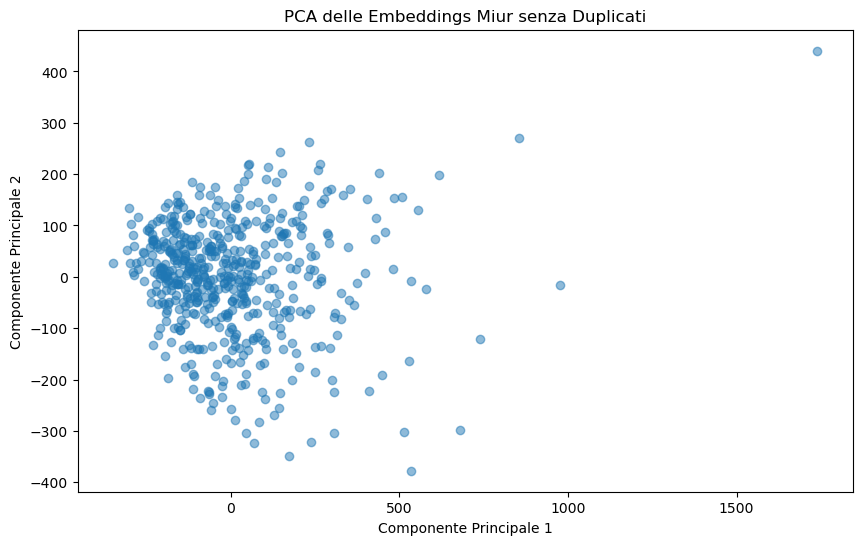

In [76]:
from sklearn.decomposition import PCA

# Supponiamo che emb_Miur_no_duplicates sia la tua matrice di embedding

# Inizializza l'oggetto PCA
pca = PCA(n_components=2)

# Calcola le componenti principali
embeddings_pca_ItalianJournal = pca.fit_transform(emb_ItalianJournal)

# Stampa la varianza spiegata
print("Varianza spiegata dalle prime due componenti principali:", pca.explained_variance_ratio_)

# Plot delle prime due componenti principali
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_pca_ItalianJournal[:, 0], embeddings_pca_ItalianJournal[:, 1], alpha=0.5)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.title('PCA delle Embeddings Miur senza Duplicati')
plt.show()

Facciamo ora k means con k da 2 a 8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


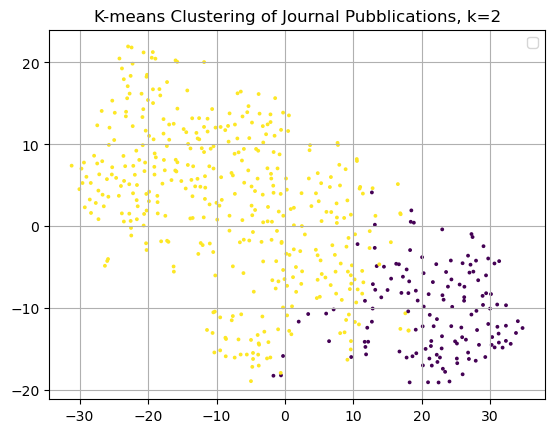

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


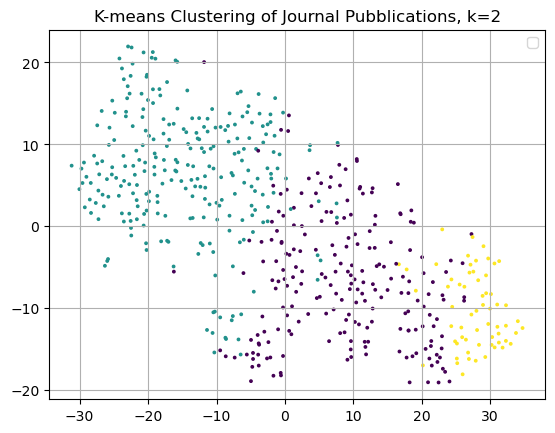

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


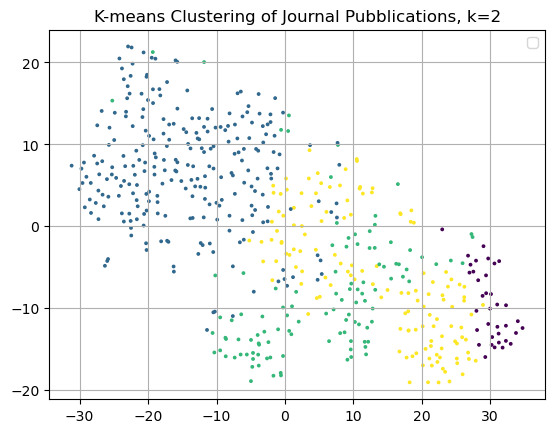

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


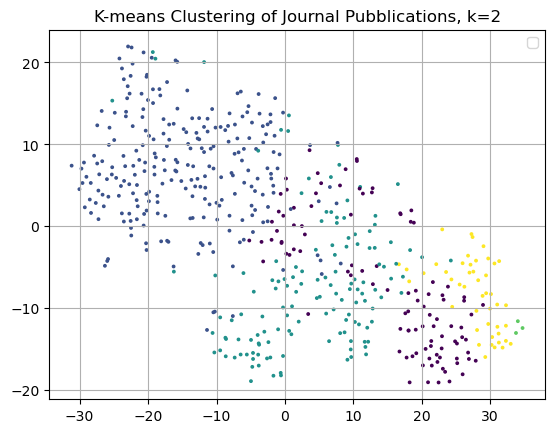

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


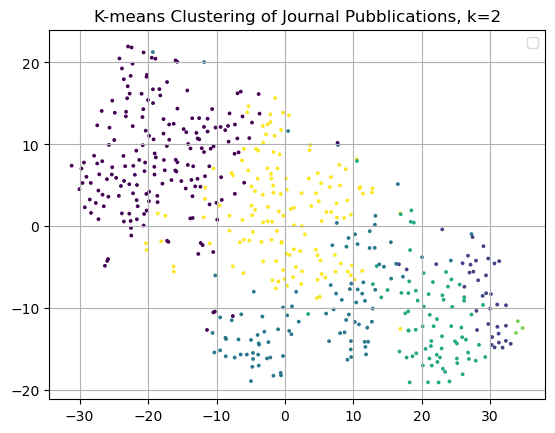

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


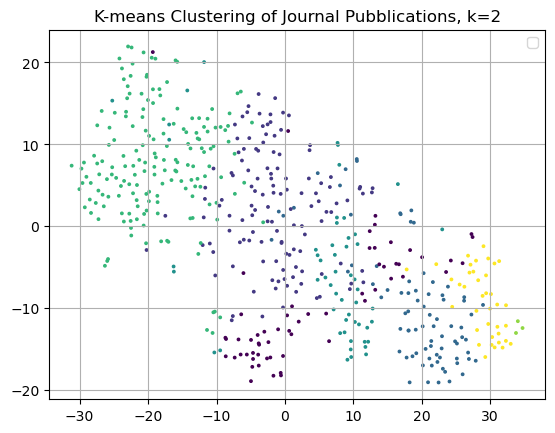

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


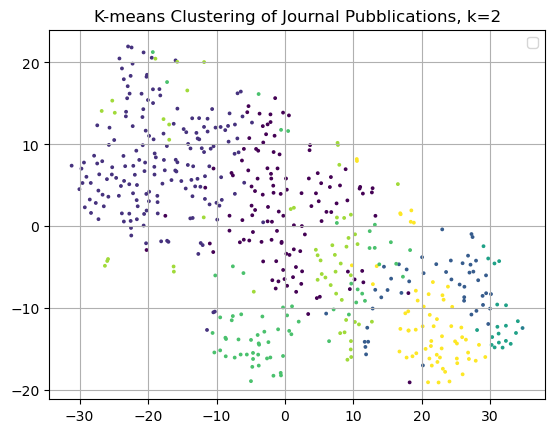

In [77]:
from sklearn.cluster import KMeans
k_vec = [2,3,4,5,6,7,8]
for k in k_vec:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(emb_ItalianJournal)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    dfItalianJournal['k-means_labels_K='+str(k)] = labels.copy()
    plt.scatter(dfItalianJournal['EmbeddingsTsneDim0'], dfItalianJournal['EmbeddingsTsneDim1'], c=labels, s=3)
    # Plot cluster centroids

    plt.title('K-means Clustering of Journal Pubblications, k=2')
    plt.legend()
    plt.grid(True)
    plt.show()


In [78]:
dfItalianJournal

Index                                               Text  Length  \
0        0  G.R. 27 aa. Da 40 gg dolore, edema ginocchio s...    1447   
1        1  S.R., ♀di 69 aa, giunge alla nostra osservazio...    1242   
2        2  Paziente di anni 32, nigeriano, da 4 anni in I...    1375   
3        3  Paziente di sesso femminile, di anni 80, giung...    1468   
4        4  Un paziente di 77 aa, dimesso dopo impianto di...    1473   
..     ...                                                ...     ...   
529    529  Donna 82 anni, autonoma fino a qualche settima...    1066   
530    530  Donna di 30 anni, accede in Pronto Soccorso pe...     908   
531    531  È stata ricoverata in stato di insufficienza m...    1308   
532    532  donna, 68 aa, giunge per dispnea in associazio...    1023   
533    533  Donna di 80 aa, giunge per prurito in terapia ...    1165   

                          Source  ColorvecLunghezza  EmbeddingsTsneDim0  \
0    Italian Journal of Medicine                  1           -3.423157   
1    Italian Journal of Medicine                  1          -11.309746   
2    Italian Journal of Medicine                  0           27.256483   
3    Italian Journal of Medicine                  0           18.220924   
4    Italian Journal of Medicine                  1           -6.392161   
..                           ...                ...                 ...   
529  Italian Journal of Medicine                  0          -20.348719   
530  Italian Journal of Medicine                  0          -18.867760   
531  Italian Journal of Medicine                  1          -23.545813   
532  Italian Journal of Medicine                  0            6.062377   
533  Italian Journal of Medicine                  0           19.113531   

     EmbeddingsTsneDim1  NumeroNodiGrafo  k-means_labels_K=2  \
0             -1.902313              114                   1   
1             13.129891              104                   1   
2             -0.947634               96                   0   
3            -19.049999               94                   0   
4            -10.743715              121                   1   
..                  ...              ...                 ...   
529           11.672513               82                   1   
530            8.413098               79                   1   
531           17.950485              110                   1   
532            1.759869               93                   1   
533          -12.618925               97                   0   

     k-means_labels_K=3  k-means_labels_K=4  k-means_labels_K=5  \
0                     0                   3                   0   
1                     1                   1                   1   
2                     0                   2                   4   
3                     0                   3                   0   
4                     1                   2                   2   
..                  ...                 ...                 ...   
529                   1                   1                   1   
530                   1                   1                   1   
531                   1                   1                   1   
532                   0                   3                   2   
533                   0                   3                   0   

     k-means_labels_K=6  k-means_labels_K=7  k-means_labels_K=8  
0                     5                   1                   0  
1                     0                   4                   1  
2                     2                   0                   2  
3                     3                   2                   0  
4                     2                   0                   5  
..                  ...                 ...                 ...  
529                   0                   4                   1  
530                   0                   4                   1  
531                   0                   4                

In [82]:
dfItalianJournal.to_excel('xVittorio\dfItalianJournal.xlsx',index = False)

# Miur

In [28]:
import pandas as pd

dfMiur = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
dfMiur['Index'] = list(range(len(lista_sourceMiur)))
dfMiur['Text'] = lista_testiMiur
dfMiur['Length'] = [len(text) for text in dfMiur['Text']]
dfMiur['Source'] = lista_sourceMiur
dfMiur['ColorvecLunghezza'] = colorvecLunghezzaMiur
dfMiur['EmbeddingsTsneDim0'] = embeddings_tsne_Miur[:,0]
dfMiur['EmbeddingsTsneDim1'] = embeddings_tsne_Miur[:,1]
dfMiur['NumeroNodiGrafo'] = vecLunghezzaMiur

In [29]:
vecLunghezzaMiur

[12,
 9,
 14,
 23,
 9,
 9,
 11,
 11,
 10,
 12,
 19,
 18,
 16,
 14,
 27,
 23,
 25,
 12,
 12,
 13,
 23,
 10,
 16,
 13,
 13,
 9,
 18,
 15,
 18,
 16,
 21,
 9,
 15,
 31,
 8,
 30,
 26,
 17,
 18,
 15,
 12,
 25,
 8,
 12,
 13,
 15,
 10,
 13,
 5,
 6,
 8,
 24,
 32,
 14,
 19,
 15,
 16,
 20,
 10,
 25,
 22,
 4,
 34,
 5,
 16,
 13,
 15,
 21,
 21,
 28,
 26,
 38,
 6,
 26,
 26,
 15,
 28,
 21,
 25,
 31,
 32,
 36,
 11,
 9,
 22,
 20,
 13,
 33,
 17,
 18,
 6,
 8,
 6,
 9,
 11,
 12,
 25,
 16,
 12,
 13,
 9,
 12,
 19,
 6,
 6,
 14,
 23,
 12,
 25,
 16,
 23,
 12,
 22,
 22,
 27,
 28,
 31,
 44,
 42,
 24,
 54,
 35,
 13,
 25,
 20,
 21,
 31,
 25,
 45,
 38,
 21,
 29,
 33,
 39,
 14,
 19,
 25,
 18,
 26,
 31,
 28,
 18,
 17,
 9,
 29,
 24,
 17,
 14,
 41,
 23,
 6,
 10,
 10,
 17,
 14,
 13,
 18,
 14,
 27,
 19,
 36,
 15,
 7,
 19,
 18,
 16,
 45,
 19,
 45,
 15,
 23,
 31,
 49,
 30,
 26,
 49,
 46,
 48,
 28,
 25,
 41,
 24,
 61,
 25,
 18,
 17,
 24,
 20,
 18,
 13,
 25,
 10,
 13,
 27,
 13,
 18,
 22,
 11,
 31,
 35,
 24,
 22,
 17,
 22,
 16,

In [32]:
len(dfMiur['Text'].unique())

1150

In [33]:
len(dfMiur)

1439

Osservo che ci sono dei duplicati del testo! Creo un dataframe senza di questi ultimi!

In [34]:
dfMiur_no_duplicates = dfMiur.drop_duplicates(subset=['Text'])


In [35]:
dfMiur_no_duplicates

Index                                               Text  Length Source  \
0         0  Un paziente di 72 anni con parkinsonismo prese...     112   Miur   
1         1  Un paziente lamenta disuria e pollacchiuria. L...     122   Miur   
2         2  Un paziente di 58 anni con una storia di 5 ann...     151   Miur   
3         3  Un garagista di 26 anni ï¿½ a letto da 3 giorn...     263   Miur   
4         4  Una paziente di 28 anni, all'ottavo mese di gr...     107   Miur   
...     ...                                                ...     ...    ...   
1432   1432  Un paziente giunge in Pronto Soccorso con diag...      86   Miur   
1433   1433  Una donna di 51 anni si reca dal proprio medic...     216   Miur   
1434   1434  Una donna di 43 anni con una diagnosi di Lupus...     356   Miur   
1435   1435  Un uomo di 73 anni si presenta all'attenzione ...     276   Miur   
1436   1436  Si reca in ambulatorio un paziente di 45 anni,...     238   Miur   

      ColorvecLunghezza  EmbeddingsTsneDim0  EmbeddingsTsneDim1  \
0                     0          -26.074144            9.200888   
1                     0          -21.295418           -3.806707   
2                     0           11.539505           16.311802   
3                     1          -15.803331           47.145695   
4                     0           -9.978947          -43.013046   
...                 ...                 ...                 ...   
1432                  0           12.014671            0.621953   
1433                  0          -18.134920           41.849312   
1434                  1          -14.086401           13.349842   
1435                  1           43.250214          -26.212271   
1436                  1          -29.692905           30.401861   

      NumeroNodiGrafo  
0                  12  
1                   9  
2                  14  
3                  23  
4                   9  
...               ...  
1432                8  
1433               14  
1434               28  
1435               20  
1436               22  

[1150 rows x 8 columns]

In [39]:
indiciUniciMiur=list(dfMiur_no_duplicates['Index'])

Un'analisi non banale che si può fare grazie a questo errore dei duplicati, è controllare che gli stessi documenti abbiano rappresentazioni molto simili!

Verifichiamolo sugli ultimi 3 documenti che erano 3 doppioni (id 1436,1437,1438)

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarita_cosinale = cosine_similarity(emb_Miur[1438].reshape(1,-1), emb_Miur[1437].reshape(1,-1))

# Stampa la similarità cosinale
print("Similarità cosinale tra array1 e array2:", similarita_cosinale[0, 0])

Similarità cosinale tra array1 e array2: 1.0


Oltre ad essere simili, osservo che InfoGraph li riconosce come esattamente identici quindi gli da lo stesso valore! Ottimo!

In [48]:
emb_Miur_no_duplicates = [embMiursingolo for i,embMiursingolo in enumerate(emb_Miur) if i in dfMiur_no_duplicates['Index']]

In [50]:
len(emb_Miur_no_duplicates)

1150

Ripeto a questo punto il tsne solo coi testi rimasti!

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


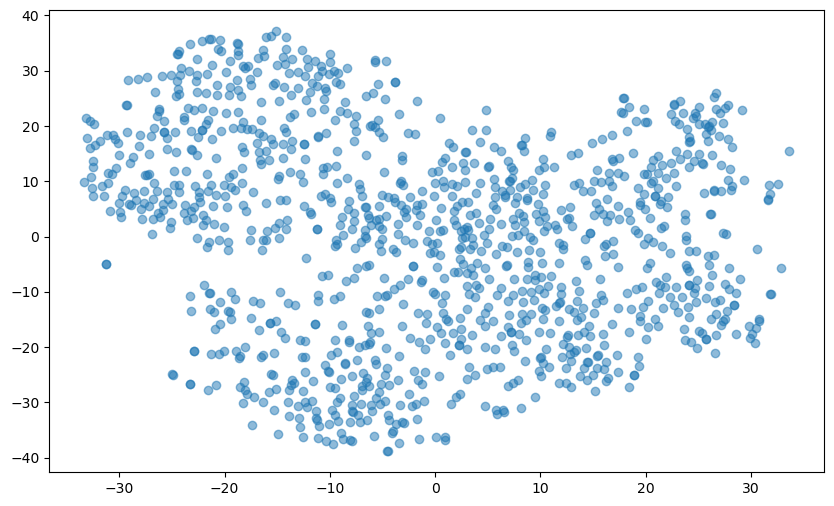

In [53]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne_Miur_no_duplicates = tsne.fit_transform(emb_Miur_no_duplicates)  # embeddings è la tua matrice di embedding



plt.figure(figsize=(10, 6))
plt.scatter(embeddings_tsne_Miur_no_duplicates[:, 0], embeddings_tsne_Miur_no_duplicates[:, 1],alpha = 0.5)
plt.show()


In [ ]:
Sistemo anche gli embeddings tsne fatto senza i duplicati!

In [55]:
dfMiur_no_duplicates['EmbeddingsTsneDim0'] = embeddings_tsne_Miur_no_duplicates[:,0]
dfMiur_no_duplicates['EmbeddingsTsneDim1'] = embeddings_tsne_Miur_no_duplicates[:,1]

C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\2546295023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['EmbeddingsTsneDim0'] = embeddings_tsne_Miur_no_duplicates[:,0]
C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\2546295023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['EmbeddingsTsneDim1'] = embeddings_tsne_Miur_no_duplicates[:,1]


In [56]:
dfMiur_no_duplicates

Index                                               Text  Length Source  \
0         0  Un paziente di 72 anni con parkinsonismo prese...     112   Miur   
1         1  Un paziente lamenta disuria e pollacchiuria. L...     122   Miur   
2         2  Un paziente di 58 anni con una storia di 5 ann...     151   Miur   
3         3  Un garagista di 26 anni ï¿½ a letto da 3 giorn...     263   Miur   
4         4  Una paziente di 28 anni, all'ottavo mese di gr...     107   Miur   
...     ...                                                ...     ...    ...   
1432   1432  Un paziente giunge in Pronto Soccorso con diag...      86   Miur   
1433   1433  Una donna di 51 anni si reca dal proprio medic...     216   Miur   
1434   1434  Una donna di 43 anni con una diagnosi di Lupus...     356   Miur   
1435   1435  Un uomo di 73 anni si presenta all'attenzione ...     276   Miur   
1436   1436  Si reca in ambulatorio un paziente di 45 anni,...     238   Miur   

      ColorvecLunghezza  EmbeddingsTsneDim0  EmbeddingsTsneDim1  \
0                     0           11.738689          -12.008980   
1                     0            3.581620           -6.969381   
2                     0          -23.240513          -26.607899   
3                     1           -4.125412          -35.452545   
4                     0           26.027500           20.063148   
...                 ...                 ...                 ...   
1432                  0           -6.256762            3.279060   
1433                  0           -1.812604          -30.375240   
1434                  1           -0.845614          -15.640221   
1435                  1          -18.272280           30.811543   
1436                  1            5.914731          -32.124260   

      NumeroNodiGrafo  
0                  12  
1                   9  
2                  14  
3                  23  
4                   9  
...               ...  
1432                8  
1433               14  
1434               28  
1435               20  
1436               22  

[1150 rows x 8 columns]

Varianza spiegata dalle prime due componenti principali: [0.26063256 0.14531703]


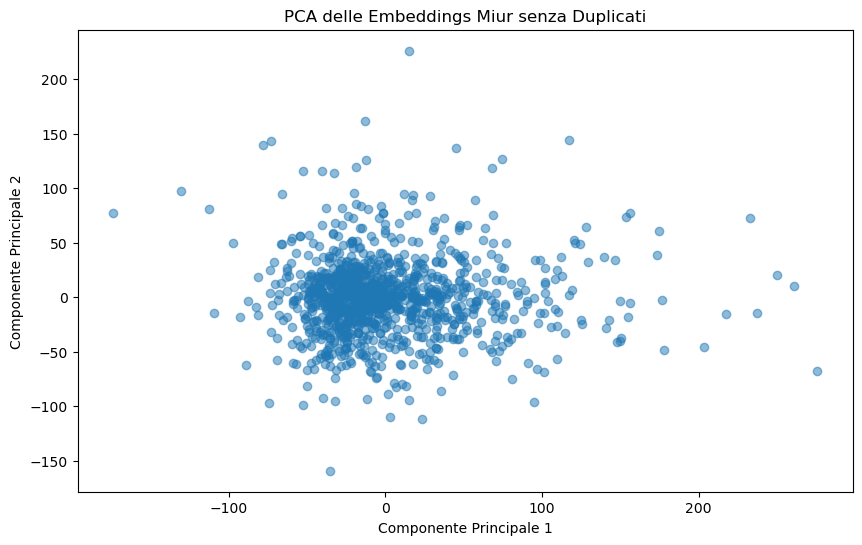

In [58]:
from sklearn.decomposition import PCA

# Supponiamo che emb_Miur_no_duplicates sia la tua matrice di embedding

# Inizializza l'oggetto PCA
pca = PCA(n_components=2)

# Calcola le componenti principali
embeddings_pca_Miur_no_duplicates = pca.fit_transform(emb_Miur_no_duplicates)

# Stampa la varianza spiegata
print("Varianza spiegata dalle prime due componenti principali:", pca.explained_variance_ratio_)

# Plot delle prime due componenti principali
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_pca_Miur_no_duplicates[:, 0], embeddings_pca_Miur_no_duplicates[:, 1], alpha=0.5)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.title('PCA delle Embeddings Miur senza Duplicati')
plt.show()

Facciamo ora k means con k da 2 a 8

C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\572997589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['k-means_labels_K='+str(k)] = labels.copy()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


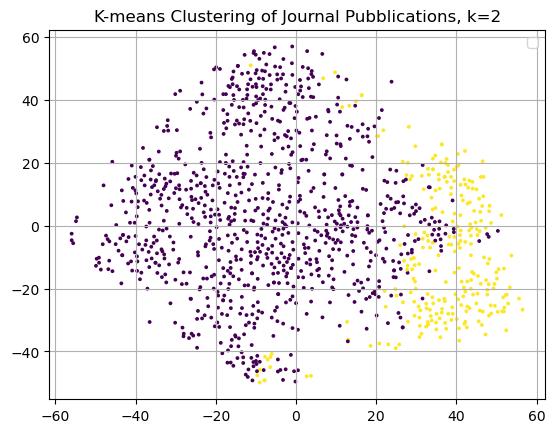

C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\572997589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['k-means_labels_K='+str(k)] = labels.copy()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


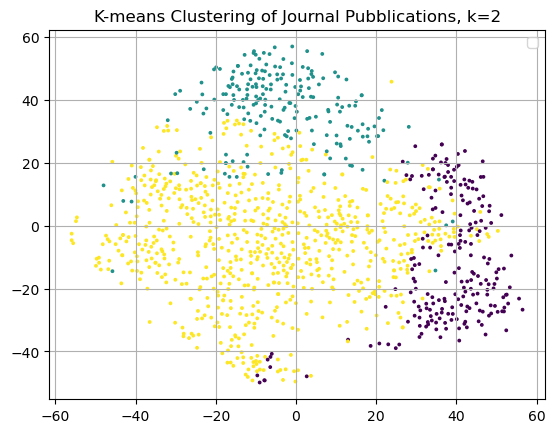

C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\572997589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['k-means_labels_K='+str(k)] = labels.copy()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


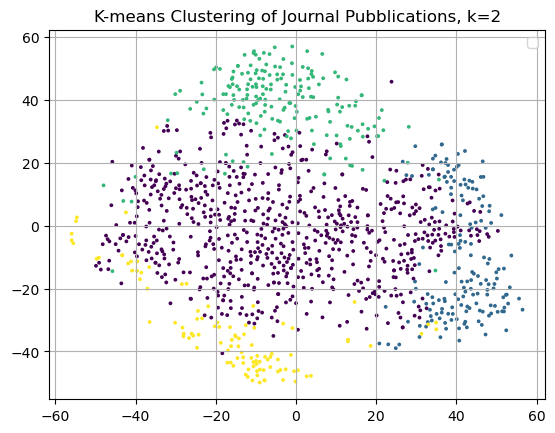

C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\572997589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['k-means_labels_K='+str(k)] = labels.copy()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


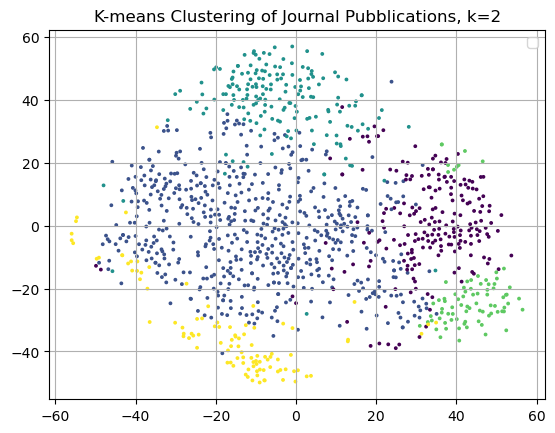

C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\572997589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['k-means_labels_K='+str(k)] = labels.copy()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


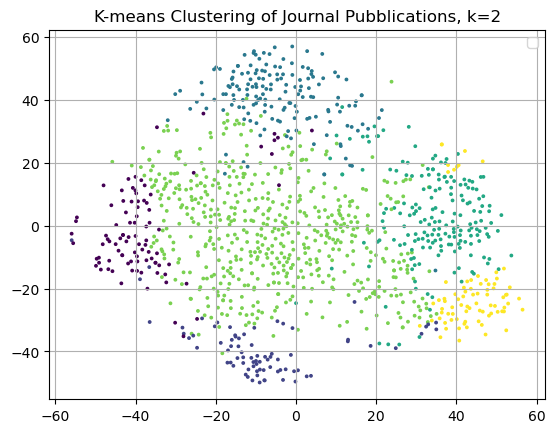

C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\572997589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['k-means_labels_K='+str(k)] = labels.copy()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


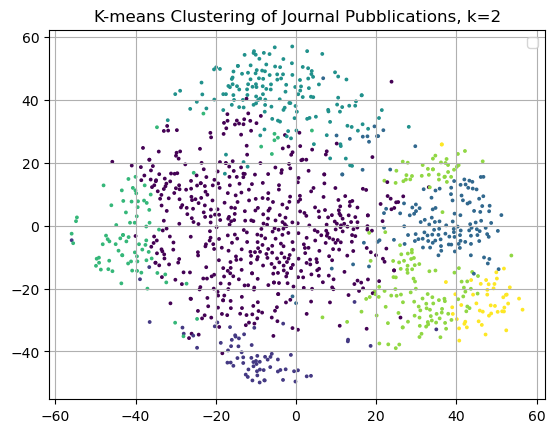

C:\Users\enduser\AppData\Local\Temp\ipykernel_16116\572997589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiur_no_duplicates['k-means_labels_K='+str(k)] = labels.copy()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


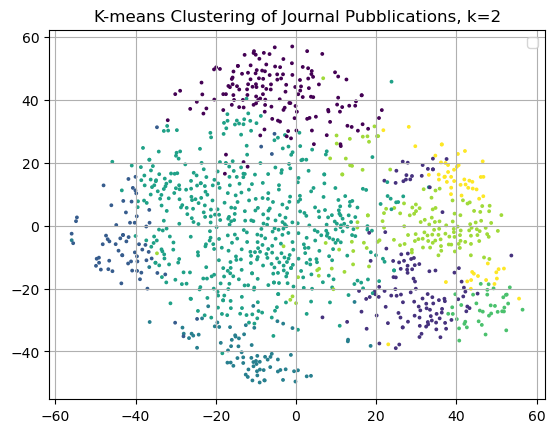

In [84]:
from sklearn.cluster import KMeans
k_vec = [2,3,4,5,6,7,8]
for k in k_vec:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(emb_Miur_no_duplicates)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    dfMiur_no_duplicates['k-means_labels_K='+str(k)] = labels.copy()
    plt.scatter(dfMiur_no_duplicates['EmbeddingsTsneDim0'], dfMiur_no_duplicates['EmbeddingsTsneDim1'], c=labels, s=3)
    # Plot cluster centroids

    plt.title('K-means Clustering of Journal Pubblications, k=2')
    plt.legend()
    plt.grid(True)
    plt.show()


In [85]:
dfMiur_no_duplicates

Index                                               Text  Length Source  \
0         0  Un paziente di 72 anni con parkinsonismo prese...     112   Miur   
1         1  Un paziente lamenta disuria e pollacchiuria. L...     122   Miur   
2         2  Un paziente di 58 anni con una storia di 5 ann...     151   Miur   
3         3  Un garagista di 26 anni ï¿½ a letto da 3 giorn...     263   Miur   
4         4  Una paziente di 28 anni, all'ottavo mese di gr...     107   Miur   
...     ...                                                ...     ...    ...   
1432   1432  Un paziente giunge in Pronto Soccorso con diag...      86   Miur   
1433   1433  Una donna di 51 anni si reca dal proprio medic...     216   Miur   
1434   1434  Una donna di 43 anni con una diagnosi di Lupus...     356   Miur   
1435   1435  Un uomo di 73 anni si presenta all'attenzione ...     276   Miur   
1436   1436  Si reca in ambulatorio un paziente di 45 anni,...     238   Miur   

      ColorvecLunghezza  EmbeddingsTsneDim0  EmbeddingsTsneDim1  \
0                     0          -26.074144            9.200888   
1                     0          -21.295418           -3.806707   
2                     0           11.539505           16.311802   
3                     1          -15.803331           47.145695   
4                     0           -9.978947          -43.013046   
...                 ...                 ...                 ...   
1432                  0           12.014671            0.621953   
1433                  0          -18.134920           41.849312   
1434                  1          -14.086401           13.349842   
1435                  1           43.250214          -26.212271   
1436                  1          -29.692905           30.401861   

      NumeroNodiGrafo  k-means_labels_K=2  k-means_labels_K=3  \
0                  12                   0                   2   
1                   9                   0                   2   
2                  14                   0                   2   
3                  23                   0                   1   
4                   9                   0                   2   
...               ...                 ...                 ...   
1432                8                   0                   2   
1433               14                   0                   1   
1434               28                   0                   2   
1435               20                   1                   0   
1436               22                   0                   2   

      k-means_labels_K=4  k-means_labels_K=5  k-means_labels_K=6  \
0                      0                   1                   4   
1                      0                   1                   4   
2                      0                   0                   3   
3                      2                   2                   2   
4                      3                   4                   1   
...                  ...                 ...                 ...   
1432                   0                   1                   4   
1433                   2                   2                   2   
1434                   0                   1                   4   
1435                   1                   3                   5   
1436                   0                   1                   4   

      k-means_labels_K=7  k-means_labels_K=8  
0                      0                   4  
1                      0                   4  
2                      2                   6  
3                      3                   0  
4                      1                   3  
...                  ...                 ...  
1432                   0                   4  
1433                   3                   0  
1434                   0                   4  
1435                   5                   1  
1436                   0                   4  

[1150 rows x 15 columns]

In [87]:
dfMiur_no_duplicates.to_excel('xVittorio\dfMiur_no_duplicates.xlsx',index = False)

# Oss da qua in poi è il codice vecchio! (può essermi utile per qualcosa)

# Layer1 analisi.

In [285]:
import pandas as pd

df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3
df['ColorvecLunghezza'] = colorvecLunghezza
df['ColorvecSource'] = colorvecSource
df['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

In [287]:
df

Index                                               Text  Length  \
0         0  C.C. iniziava a fare dialisi all’età di 17 ann...    4372   
1         1  I.Z. è un giovane di 22 anni. Pochi giorni pri...    6579   
2         2  Nel giugno 2007 presso la Struttura Complessa ...    4478   
3         3  Donna di 75 anni affetta da diabete mellito di...    2745   
4         4  Nel settembre del 2008 giunge alla nostra osse...    5750   
...     ...                                                ...     ...   
2124   2124  Femmina - aa. 77 –\n\nAnamnesi patologica remo...   13387   
2125   2125  1° caso clinico\n\nFemmina - aa. 77\nAnamnesi ...    5799   
2126   2126  Maschio- aa. 52\n\nAnamnesi patologica remota\...    4758   
2127   2127  femmina, aa. 86\n\nAnamnesi patologica.\nprece...    4888   
2128   2128  Maschio - età aa. 49\n\nAnamnesi Patologica Re...    5395   

                                              Source  ColorvecLunghezza  \
0     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
1     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
2     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
3     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
4     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
...                                              ...                ...   
2124               Prof. Dr. Francescopaolo Mattioli                  1   
2125               Prof. Dr. Francescopaolo Mattioli                  1   
2126               Prof. Dr. Francescopaolo Mattioli                  1   
2127               Prof. Dr. Francescopaolo Mattioli                  1   
2128               Prof. Dr. Francescopaolo Mattioli                  1   

      ColorvecSource  EmbeddingsTsneDim0  EmbeddingsTsneDim1 VecLunghezza  
0                  1           30.822714           57.652451        Lungo  
1                  1           32.106537           57.378700        Lungo  
2                  1           31.380047           57.387531        Lungo  
3                  1           37.489555           38.905788        Lungo  
4                  1           33.237316           56.345196        Lungo  
...              ...                 ...                 ...          ...  
2124               1           32.300713           54.908382        Lungo  
2125               1           37.850964           -3.793020        Lungo  
2126               1            7.440516            0.583831        Lungo  
2127               1            4.437738            7.323576        Lungo  
2128               1            8.784402           54.305702        Lungo  

[2129 rows x 9 columns]

In [22]:
len(df['Source'].unique())

12

In [23]:
5%5

0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


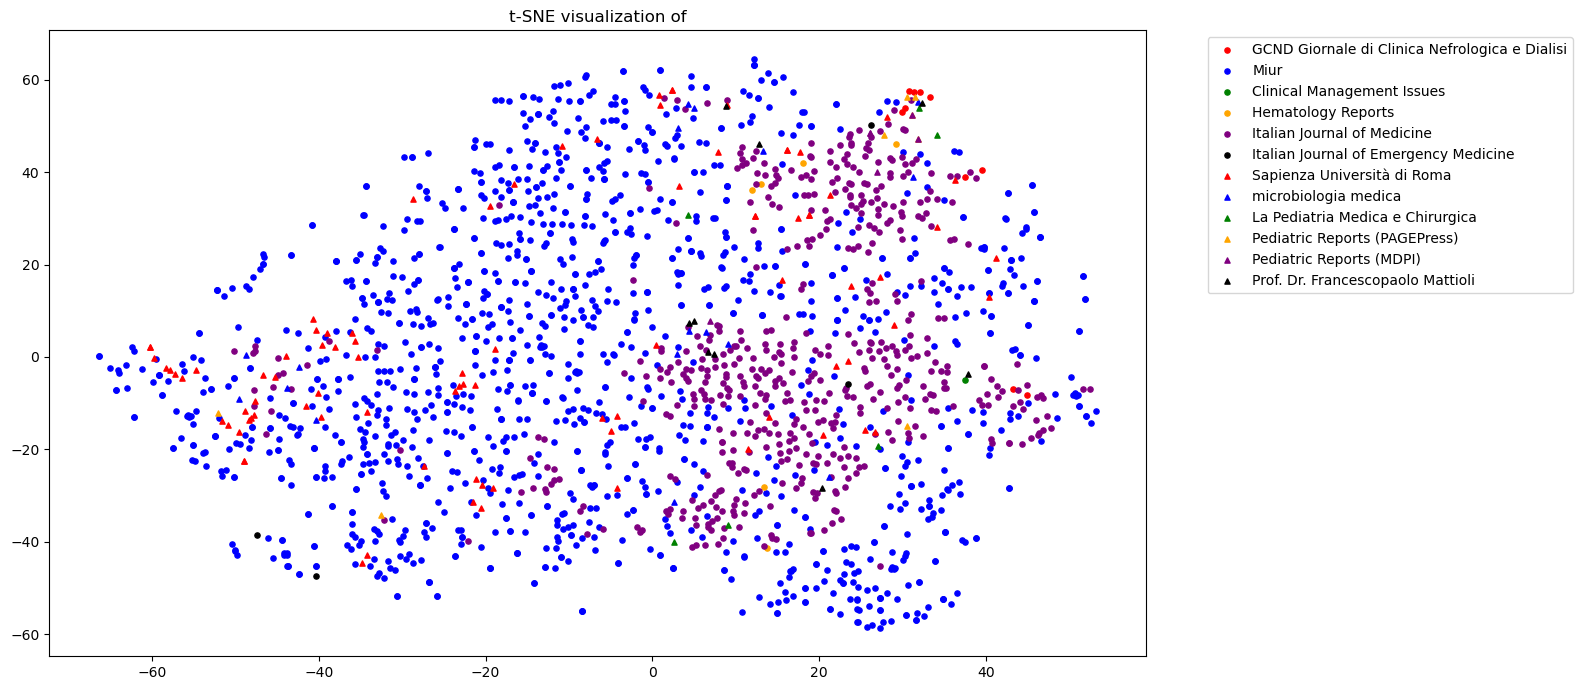

In [288]:
colori = ['red', 'blue', 'green', 'orange', 'purple','black']
stili = ['o', '^', 's', 'x', '*']

for i, source in enumerate(df['Source'].unique()):
    colore = colori[i%6]
    if i <6:
        stile = 'o'
    if i >=6:
        stile = '^'
    

    
    plt.scatter(df[df['Source'] == source]['EmbeddingsTsneDim0'], 
                df[df['Source'] == source]['EmbeddingsTsneDim1'], 
                s=14, label=source, c = colore ,marker =stile)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(16, 7)  # Imposta le dimensioni della figura
plt.title('t-SNE visualization of')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/lunghezza_sources_layer1.svg')
plt.savefig('immagini\lunghezza_sources_layer1.eps')
plt.show()

In [25]:
acc = [df['ColorvecLunghezza'] == df['ColorvecSource']]

sum(list(sum(list(acc))))

# c'è una corrispondenza quasi totale!

1957

In [26]:
dfMiurSap = df[df['ColorvecSource']==0]
dfOther = df[df['ColorvecSource']==1]

In [27]:
dfMiurSap

Index                                               Text  Length Source  \
10       10  Un paziente di 72 anni con parkinsonismo prese...     112   Miur   
11       11  Un paziente lamenta disuria e pollacchiuria. L...     122   Miur   
12       12  Un paziente di 58 anni con una storia di 5 ann...     151   Miur   
13       13  Un garagista di 26 anni ï¿½ a letto da 3 giorn...     263   Miur   
14       14  Una paziente di 28 anni, all'ottavo mese di gr...     107   Miur   
...     ...                                                ...     ...    ...   
2115   2115  Una donna di 43 anni con una diagnosi di Lupus...     356   Miur   
2116   2116  Un uomo di 73 anni si presenta all'attenzione ...     276   Miur   
2117   2117  Si reca in ambulatorio un paziente di 45 anni,...     238   Miur   
2118   2118  Si reca in ambulatorio un paziente di 45 anni,...     238   Miur   
2119   2119  Si reca in ambulatorio un paziente di 45 anni,...     238   Miur   

      ColorvecLunghezza  ColorvecSource  EmbeddingsTsneDim0  \
10                    0               0          -29.569483   
11                    0               0           -0.274836   
12                    0               0           45.557388   
13                    0               0           -8.708750   
14                    0               0           -2.638009   
...                 ...             ...                 ...   
2115                  0               0          -22.994982   
2116                  0               0           36.504200   
2117                  0               0           -5.753240   
2118                  0               0           -5.753242   
2119                  0               0           -5.753910   

      EmbeddingsTsneDim1 VecLunghezza  
10             -7.553520        Corto  
11            -41.663464        Corto  
12             37.235474        Corto  
13              0.667452        Corto  
14             27.995195        Corto  
...                  ...          ...  
2115          -40.440933        Corto  
2116          -13.809549        Corto  
2117           38.459591        Corto  
2118           38.461311        Corto  
2119           38.460976        Corto  

[1528 rows x 9 columns]

In [28]:
pca = PCA(n_components=2)  # Specifica il numero di componenti principali desiderate
embeddings_pca = pca.fit_transform(emb3) 

In [29]:
explained_variance_ratio = pca.explained_variance_ratio_

print("Percentuale di varianza spiegata da ciascuna componente principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio*100:.2f}%")

Percentuale di varianza spiegata da ciascuna componente principale:
PC1: 21.47%
PC2: 16.18%


Osservo che non è più vero che pca spiega bene il dataset (non posso rappresentare i punti con pca perchè pc1 e 2 spiegano meno del 40%

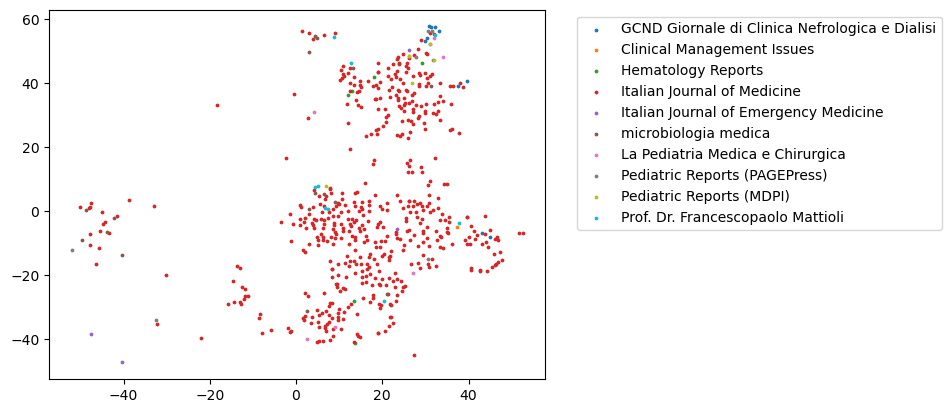

In [30]:
for source in dfOther['Source'].unique():
    plt.scatter(dfOther[dfOther['Source'] == source]['EmbeddingsTsneDim0'], 
                dfOther[dfOther['Source'] == source]['EmbeddingsTsneDim1'], 
                s=3, label=source)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

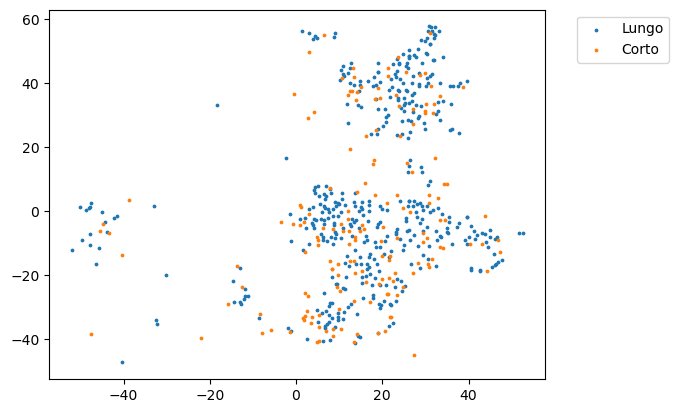

In [31]:
for lunghezza in dfOther['VecLunghezza'].unique():
    plt.scatter(dfOther[dfOther['VecLunghezza']==lunghezza]['EmbeddingsTsneDim0'],
                dfOther[dfOther['VecLunghezza']==lunghezza]['EmbeddingsTsneDim1'], s = 3, label = lunghezza)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




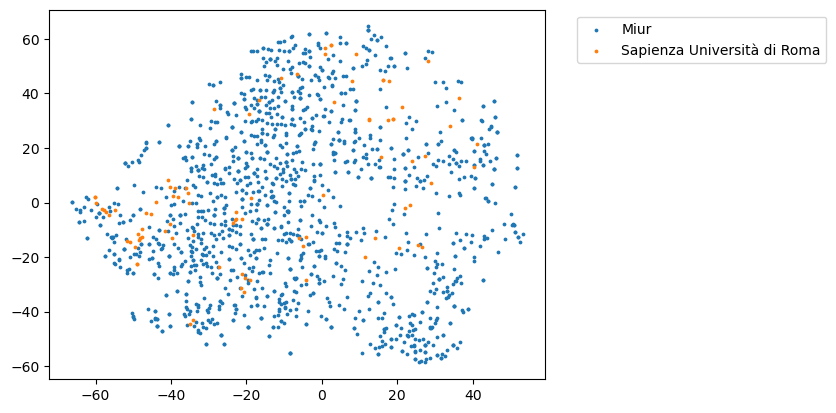

In [32]:
for source in dfMiurSap['Source'].unique():
    plt.scatter(dfMiurSap[dfMiurSap['Source'] == source]['EmbeddingsTsneDim0'], 
                dfMiurSap[dfMiurSap['Source'] == source]['EmbeddingsTsneDim1'], 
                s=3, label=source)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

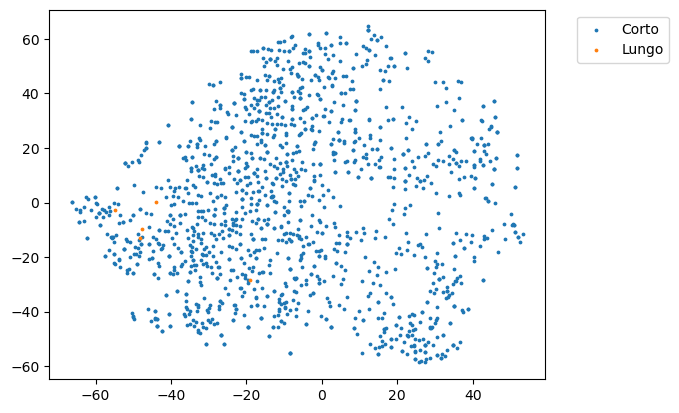

In [33]:
for lunghezza in dfMiurSap['VecLunghezza'].unique():
    plt.scatter(dfMiurSap[dfMiurSap['VecLunghezza']==lunghezza]['EmbeddingsTsneDim0'],
                dfMiurSap[dfMiurSap['VecLunghezza']==lunghezza]['EmbeddingsTsneDim1'], s = 3, label = lunghezza)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Creo numpy matrix che contengano solo gli embedding dei due gruppi Other e MiurSap

In [34]:
emb3Other = emb3[dfOther['Index']]
emb3MiurSap = emb3[dfMiurSap['Index']]


# Sul layer 3 vedo clustering di MiurSap

Clustering sugli embeddings con euclidean distance (non l'ideale per curse of dimensionality).
Non sono riuscito a modificare la metrica in "cosine", alternativamente posso diminuire la dimensionalità degli embeddings prodotti da infoGraph (chiedo al Vittorio).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


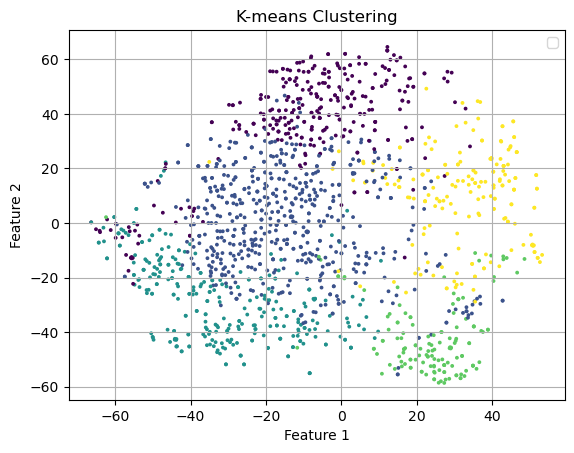

In [106]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(emb3MiurSap)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(dfMiurSap['EmbeddingsTsneDim0'], dfMiurSap['EmbeddingsTsneDim1'], c=labels, cmap='viridis', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

CLustering con la matrice delle distanze (cosine similarity)

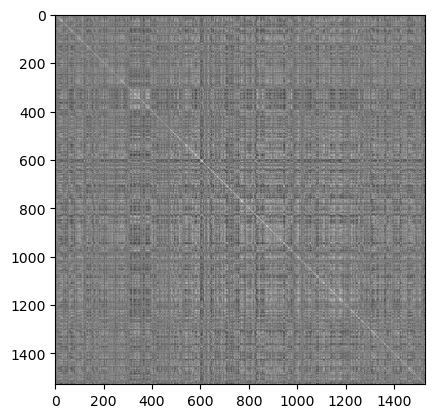

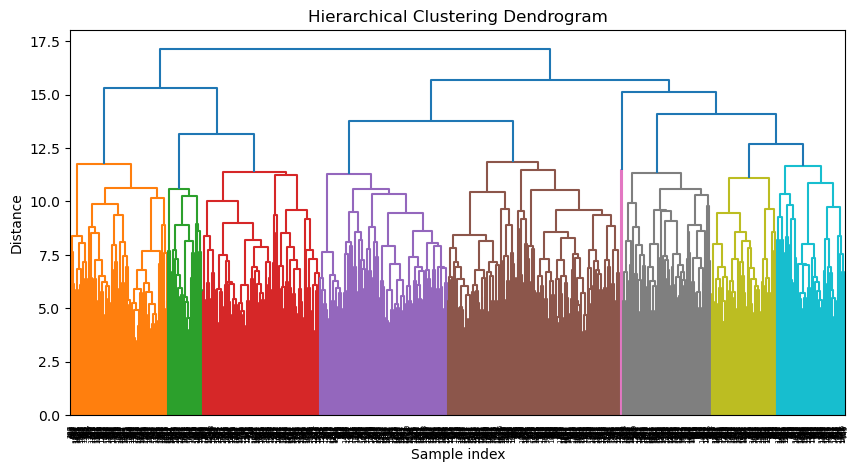

Numero di cluster: 5
Etichette dei cluster: [2 1 4 ... 4 4 4]


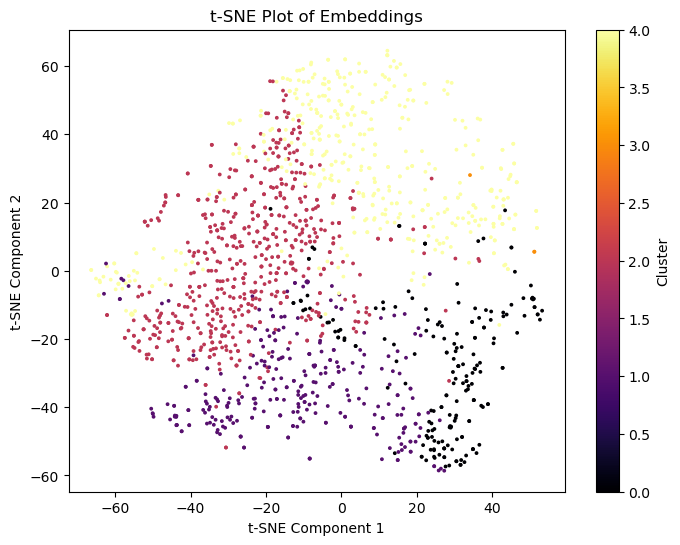

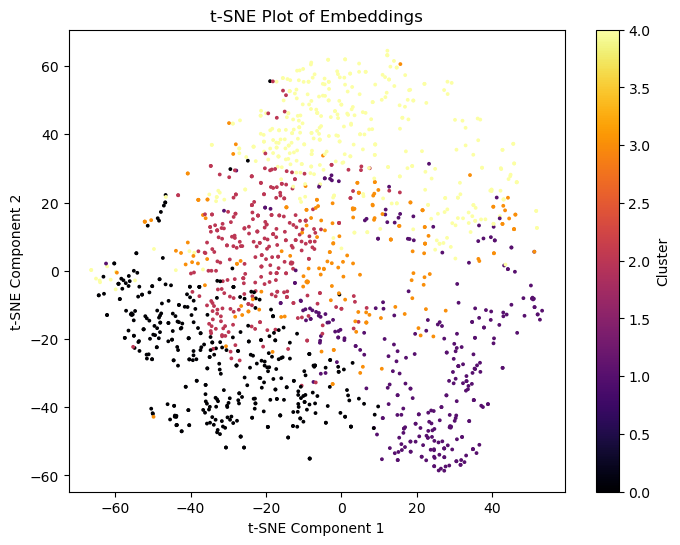

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcola la matrice di similarità coseno
similarity_matrix = cosine_similarity(emb3MiurSap) # calcolo matrice di similarità documenti
import matplotlib.pyplot as plt

plt.imshow(similarity_matrix, cmap='gray')
plt.show()

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(similarity_matrix, method='average') # complete linkage mi sembra il migliore
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

from scipy.cluster.hierarchy import fcluster

# Determina i cluster tagliando il dendrogramma ad una certa altezza
max_d = 15  # Altezza di taglio del dendrogramma
clustersHierarchicaldoc2vec = fcluster(Z, max_d, criterion='distance')-1

# Stampa il numero di cluster e le etichette dei cluster
num_clusters = len(set(clustersHierarchicaldoc2vec))
print(f"Numero di cluster: {num_clusters}")
print("Etichette dei cluster:", clustersHierarchicaldoc2vec)


#KMEDOIDS

import numpy as np
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

kmedoids = KMedoids(n_clusters=5, random_state=0)
kmedoids.fit(similarity_matrix)
clustersKMEDOIDSdoc2vec = kmedoids.labels_
centroids = similarity_matrix[kmedoids.medoid_indices_]

plt.figure(figsize=(8, 6))
plt.scatter(dfMiurSap['EmbeddingsTsneDim0'], dfMiurSap['EmbeddingsTsneDim1'], c=clustersHierarchicaldoc2vec, s =3, cmap='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(dfMiurSap['EmbeddingsTsneDim0'], dfMiurSap['EmbeddingsTsneDim1'], c=clustersKMEDOIDSdoc2vec, s=3,cmap ='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


Domanda, dovrei rifare tsne solo su MiurSap e Other separati? io direi di no..

Vediamo ora qualè il parametro migliore di k, con la shiloutte score!

In [108]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_score(similarity_matrix, clustersHierarchicaldoc2vec)

0.12134522

Osserviamo che hierarchical clustering non è affatto male visivamente! Ma ha una bassa silhoutte scre

Clusters fatti dalla matrice di similarità:

In [109]:
k_vec = [2,3,4,5,6,7,8,9]
silouette_scoresMedoidSimilarity = []
silouette_scoresMedoidEmbeddings=[]
silouette_scoresMeanSimilarity = []
silouette_scoresMeanEmbeddings = []


for k in k_vec:
    kmedoids = KMedoids(n_clusters=k, random_state=1)
    kmedoids.fit(similarity_matrix)
    clustersKMEDOIDSdoc2vec = kmedoids.labels_
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(similarity_matrix)
    clustersKMeans = kmeans.labels_
    #print(silhouette_score(emb3MiurSap, clustersKMEDOIDSdoc2vec),k,'kmedoids')
    silouette_scoresMedoidEmbeddings.append(silhouette_score(emb3MiurSap, clustersKMEDOIDSdoc2vec))
    #print(silhouette_score(similarity_matrix, clustersKMEDOIDSdoc2vec),k,'\n')
    silouette_scoresMedoidSimilarity.append(silhouette_score(similarity_matrix, clustersKMEDOIDSdoc2vec))

    #print(silhouette_score(emb3MiurSap, clustersKMeans),k,'clustersKMeans')
    silouette_scoresMeanEmbeddings.append(silhouette_score(emb3MiurSap, clustersKMeans))

    #print(silhouette_score(similarity_matrix, clustersKMeans),k,'\n')
    silouette_scoresMeanSimilarity.append(silhouette_score(similarity_matrix, clustersKMeans))

    

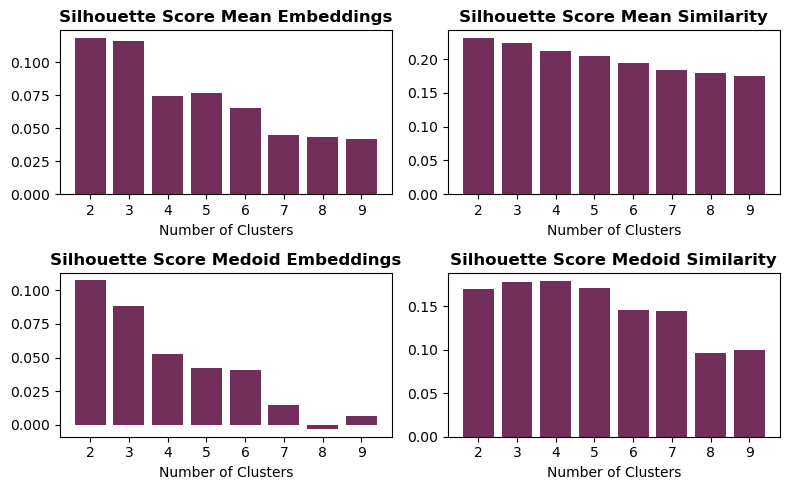

In [110]:
import matplotlib.pyplot as plt

# List of K values
k_vec = [2, 3, 4, 5, 6, 7, 8, 9]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Plot each silhouette score in a subplot
axs[0, 0].bar(k_vec, silouette_scoresMeanEmbeddings, align='center', color='#722f59')
axs[0, 0].set_title('Silhouette Score Mean Embeddings', fontweight='bold')
axs[0, 0].set_xlabel('Number of Clusters')
axs[0, 0].set_xticks(k_vec)
axs[0, 1].bar(k_vec, silouette_scoresMeanSimilarity, align='center', color='#722f59')
axs[0, 1].set_title('Silhouette Score Mean Similarity', fontweight='bold')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_xticks(k_vec)
axs[1, 0].bar(k_vec, silouette_scoresMedoidEmbeddings, align='center', color='#722f59')
axs[1, 0].set_title('Silhouette Score Medoid Embeddings', fontweight='bold')
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_xticks(k_vec)
axs[1, 1].bar(k_vec, silouette_scoresMedoidSimilarity, align='center', color='#722f59')
axs[1, 1].set_title('Silhouette Score Medoid Similarity', fontweight='bold')
axs[1, 1].set_xlabel('Number of Clusters')
axs[1, 1].set_xticks(k_vec)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Vediamo che le silhouette scores sono meglio con la similarity matrix. Scegliamo quindi k = 4 e valutiamo i risultati in entrambi i metodi

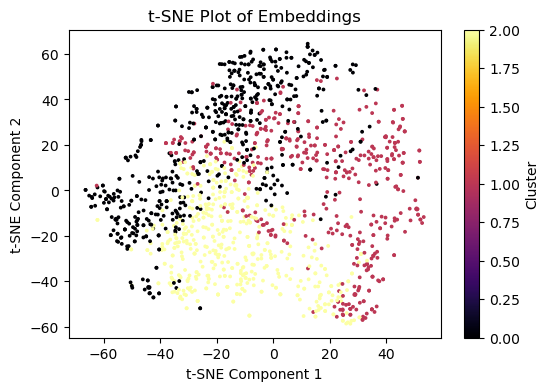

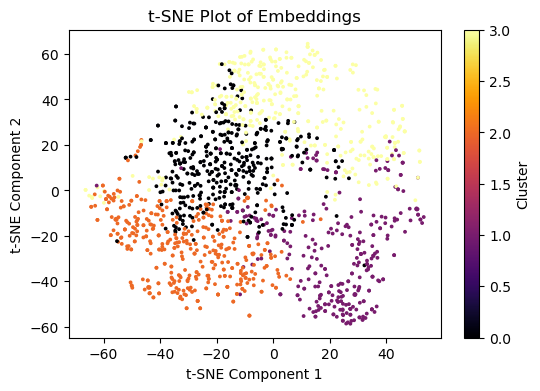

In [111]:
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit(similarity_matrix)
clustersKMEDOIDSdoc2vec = kmedoids.labels_
centroids = similarity_matrix[kmedoids.medoid_indices_]

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(similarity_matrix)
clustersKMeans = kmeans.labels_

plt.figure(figsize=(6, 4))
plt.scatter(dfMiurSap['EmbeddingsTsneDim0'], dfMiurSap['EmbeddingsTsneDim1'], c=clustersKMEDOIDSdoc2vec, s =3, cmap='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(dfMiurSap['EmbeddingsTsneDim0'], dfMiurSap['EmbeddingsTsneDim1'], c=clustersKMeans, s=3,cmap ='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

Clusters fatti con gli embeddings puri

In [112]:
k_vec = [2,3,4,5,6,7,8,9]
silouette_scoresMedoidSimilarity = []
silouette_scoresMedoidEmbeddings=[]
silouette_scoresMeanSimilarity = []
silouette_scoresMeanEmbeddings = []


for k in k_vec:
    kmedoids = KMedoids(n_clusters=k, random_state=1)
    kmedoids.fit(emb3MiurSap)
    clustersKMEDOIDSdoc2vec = kmedoids.labels_
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(emb3MiurSap)
    clustersKMeans = kmeans.labels_
    #print(silhouette_score(emb3MiurSap, clustersKMEDOIDSdoc2vec),k,'kmedoids')
    silouette_scoresMedoidEmbeddings.append(silhouette_score(emb3MiurSap, clustersKMEDOIDSdoc2vec))
    #print(silhouette_score(similarity_matrix, clustersKMEDOIDSdoc2vec),k,'\n')
    silouette_scoresMedoidSimilarity.append(silhouette_score(similarity_matrix, clustersKMEDOIDSdoc2vec))

    #print(silhouette_score(emb3MiurSap, clustersKMeans),k,'clustersKMeans')
    silouette_scoresMeanEmbeddings.append(silhouette_score(emb3MiurSap, clustersKMeans))

    #print(silhouette_score(similarity_matrix, clustersKMeans),k,'\n')
    silouette_scoresMeanSimilarity.append(silhouette_score(similarity_matrix, clustersKMeans))


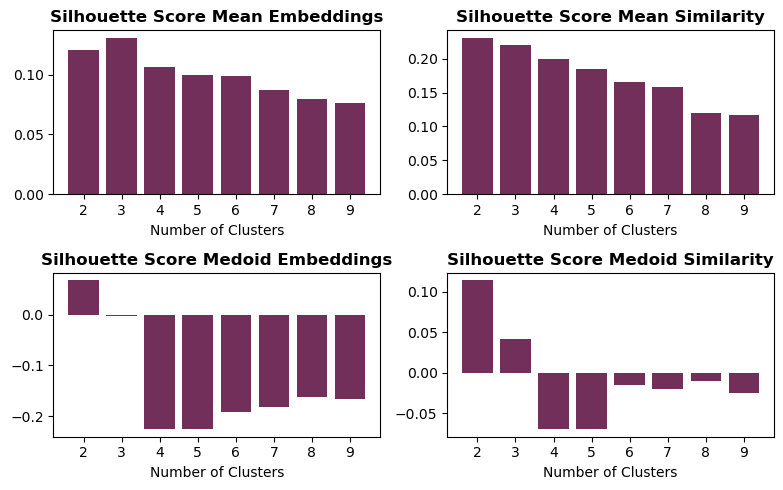

In [113]:
# List of K values
k_vec = [2, 3, 4, 5, 6, 7, 8, 9]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Plot each silhouette score in a subplot
axs[0, 0].bar(k_vec, silouette_scoresMeanEmbeddings, align='center', color='#722f59')
axs[0, 0].set_title('Silhouette Score Mean Embeddings', fontweight='bold')
axs[0, 0].set_xlabel('Number of Clusters')
axs[0, 0].set_xticks(k_vec)
axs[0, 1].bar(k_vec, silouette_scoresMeanSimilarity, align='center', color='#722f59')
axs[0, 1].set_title('Silhouette Score Mean Similarity', fontweight='bold')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_xticks(k_vec)
axs[1, 0].bar(k_vec, silouette_scoresMedoidEmbeddings, align='center', color='#722f59')
axs[1, 0].set_title('Silhouette Score Medoid Embeddings', fontweight='bold')
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_xticks(k_vec)
axs[1, 1].bar(k_vec, silouette_scoresMedoidSimilarity, align='center', color='#722f59')
axs[1, 1].set_title('Silhouette Score Medoid Similarity', fontweight='bold')
axs[1, 1].set_xlabel('Number of Clusters')
axs[1, 1].set_xticks(k_vec)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Osserviamo che kmedoid funziona molto male qui. Quindi scegliamo k = 2.

In [114]:
centroids

array([[ 0.23849244, -0.12413477, -0.02331384, ...,  0.00487231,
         0.00487231,  0.00487231],
       [ 0.06229113, -0.11622435,  0.16678634, ...,  0.2409978 ,
         0.2409978 ,  0.2409978 ],
       [ 0.35248655,  0.6726634 , -0.39397877, ..., -0.2336231 ,
        -0.2336231 , -0.2336231 ]], dtype=float32)

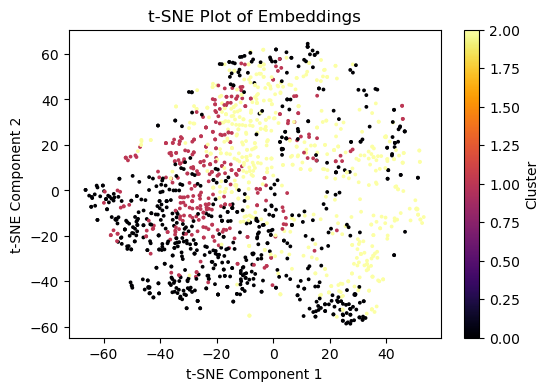

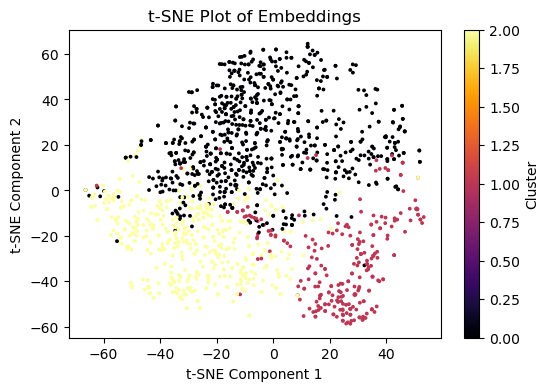

In [115]:
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit(emb3MiurSap)
clustersKMEDOIDSdoc2vec = kmedoids.labels_
centroids = similarity_matrix[kmedoids.medoid_indices_]

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(emb3MiurSap)
clustersKMeans = kmeans.labels_

plt.figure(figsize=(6, 4))
plt.scatter(dfMiurSap['EmbeddingsTsneDim0'], dfMiurSap['EmbeddingsTsneDim1'], c=clustersKMEDOIDSdoc2vec, s =3, cmap='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(dfMiurSap['EmbeddingsTsneDim0'], dfMiurSap['EmbeddingsTsneDim1'], c=clustersKMeans, s=3,cmap ='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

k-means lavora bene anche con gli embeddings quindi sembra che non stiamo avendo problemi di curse of dimensionality!

# Sul layer 3 vedo clustering di Other
ripeto paro paro quello che ho fatto per MiurSap

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


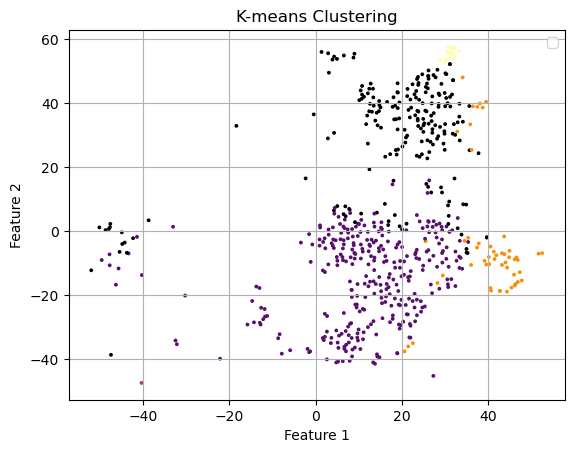

In [116]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(emb3Other)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(dfOther['EmbeddingsTsneDim0'], dfOther['EmbeddingsTsneDim1'], c=labels, cmap='inferno', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

clustering con matrice di similarità

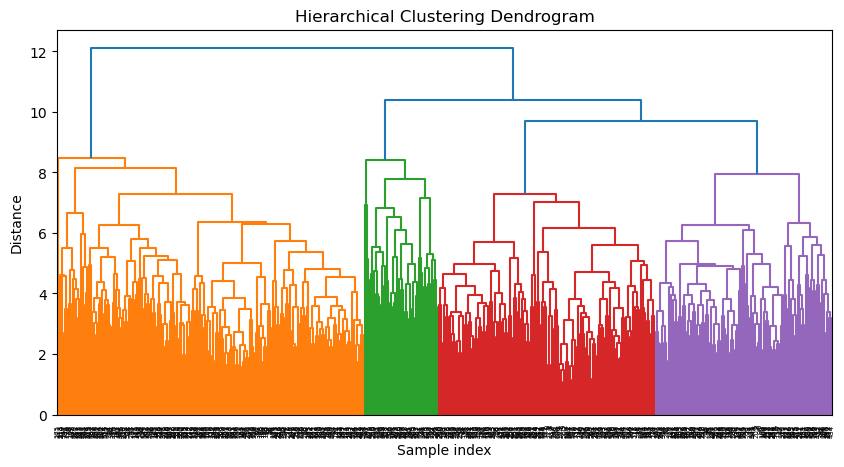

Numero di cluster: 4
Etichette dei cluster: [2 2 2 3 2 3 3 3 2 2 3 2 2 2 2 0 0 3 0 3 2 0 1 0 0 0 0 0 2 2 2 1 3 0 2 0 0
 2 0 0 2 3 0 0 0 0 1 3 1 3 2 3 2 0 3 2 2 3 0 2 0 0 0 3 1 3 2 3 0 2 0 0 3 3
 0 2 3 2 0 3 0 2 0 0 1 1 0 1 0 2 3 2 0 2 3 0 3 0 0 0 0 0 1 3 3 0 3 3 0 3 2
 2 2 3 0 2 2 0 3 2 2 2 0 0 0 3 0 2 2 0 2 3 0 2 2 0 3 0 0 2 3 0 3 2 0 0 3 0
 0 0 0 1 0 3 0 2 2 2 0 0 0 0 0 1 3 0 3 0 0 3 3 3 2 3 0 0 2 0 2 0 2 3 1 0 2
 2 0 0 2 0 3 3 0 0 0 0 3 1 0 3 0 0 3 2 2 3 0 0 0 3 2 3 2 0 0 3 0 0 0 0 1 0
 3 3 0 0 0 3 3 0 0 3 0 3 0 0 0 0 0 3 2 3 0 0 2 0 0 1 2 3 2 2 3 1 3 2 3 0 2
 1 1 0 3 2 3 3 2 1 0 0 0 2 3 2 2 3 0 1 0 2 3 2 2 2 0 0 1 2 2 1 3 0 3 0 0 3
 3 0 0 2 3 2 0 2 3 2 1 3 0 2 3 0 0 0 0 0 0 2 2 3 0 0 3 0 3 0 2 0 1 2 3 0 0
 2 2 3 0 2 0 0 2 1 1 3 3 2 2 2 1 0 0 1 0 2 0 2 2 2 0 0 0 2 0 2 0 0 0 0 3 0
 2 2 2 3 0 1 3 1 2 2 2 2 2 1 2 2 0 2 1 0 3 1 0 2 2 0 0 0 3 3 0 3 0 0 0 2 0
 2 2 1 2 0 3 3 2 0 3 2 3 0 0 2 3 1 2 0 3 1 1 0 0 3 3 0 3 0 3 2 1 0 3 0 3 3
 2 2 0 0 3 0 3 2 2 2 0 2 3 0 0 3 0 3 2 0 3 3 0 0 1 3 0 2

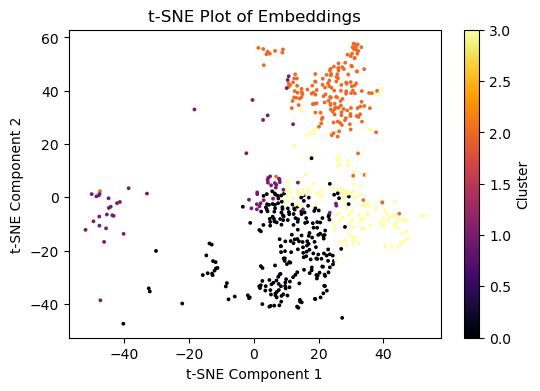

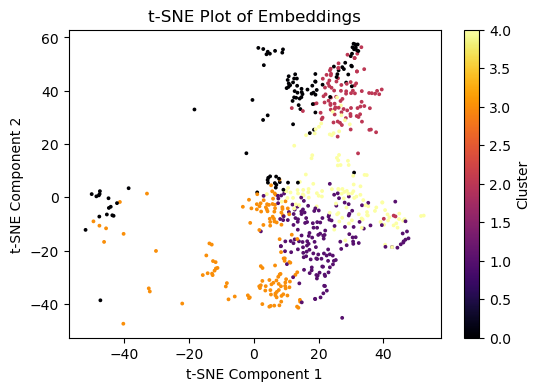

In [117]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcola la matrice di similarità coseno
similarity_matrix = cosine_similarity(emb3Other) # calcolo matrice di similarità documenti
import matplotlib.pyplot as plt

#plt.imshow(similarity_matrix, cmap='gray')
#plt.show()

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(similarity_matrix, method='average') # complete linkage mi sembra il migliore
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

from scipy.cluster.hierarchy import fcluster

# Determina i cluster tagliando il dendrogramma ad una certa altezza
max_d = 9  # Altezza di taglio del dendrogramma
clustersHierarchicaldoc2vec = fcluster(Z, max_d, criterion='distance')-1

# Stampa il numero di cluster e le etichette dei cluster
num_clusters = len(set(clustersHierarchicaldoc2vec))
print(f"Numero di cluster: {num_clusters}")
print("Etichette dei cluster:", clustersHierarchicaldoc2vec)


#KMEDOIDS

import numpy as np
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

kmedoids = KMedoids(n_clusters=5, random_state=0)
kmedoids.fit(similarity_matrix)
clustersKMEDOIDSdoc2vec = kmedoids.labels_
centroids = similarity_matrix[kmedoids.medoid_indices_]

plt.figure(figsize=(6, 4))
plt.scatter(dfOther['EmbeddingsTsneDim0'], dfOther['EmbeddingsTsneDim1'], c=clustersHierarchicaldoc2vec, s =3, cmap='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(dfOther['EmbeddingsTsneDim0'], dfOther['EmbeddingsTsneDim1'], c=clustersKMEDOIDSdoc2vec, s=3,cmap ='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [118]:
k_vec = [2,3,4,5,6,7,8,9]
silouette_scoresMedoidSimilarity = []
silouette_scoresMedoidEmbeddings=[]
silouette_scoresMeanSimilarity = []
silouette_scoresMeanEmbeddings = []


for k in k_vec:
    kmedoids = KMedoids(n_clusters=k, random_state=1)
    kmedoids.fit(similarity_matrix)
    clustersKMEDOIDSdoc2vec = kmedoids.labels_
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(similarity_matrix)
    clustersKMeans = kmeans.labels_
    #print(silhouette_score(emb3MiurSap, clustersKMEDOIDSdoc2vec),k,'kmedoids')
    silouette_scoresMedoidEmbeddings.append(silhouette_score(emb3Other, clustersKMEDOIDSdoc2vec))
    #print(silhouette_score(similarity_matrix, clustersKMEDOIDSdoc2vec),k,'\n')
    silouette_scoresMedoidSimilarity.append(silhouette_score(similarity_matrix, clustersKMEDOIDSdoc2vec))

    #print(silhouette_score(emb3MiurSap, clustersKMeans),k,'clustersKMeans')
    silouette_scoresMeanEmbeddings.append(silhouette_score(emb3Other, clustersKMeans))

    #print(silhouette_score(similarity_matrix, clustersKMeans),k,'\n')
    silouette_scoresMeanSimilarity.append(silhouette_score(similarity_matrix, clustersKMeans))

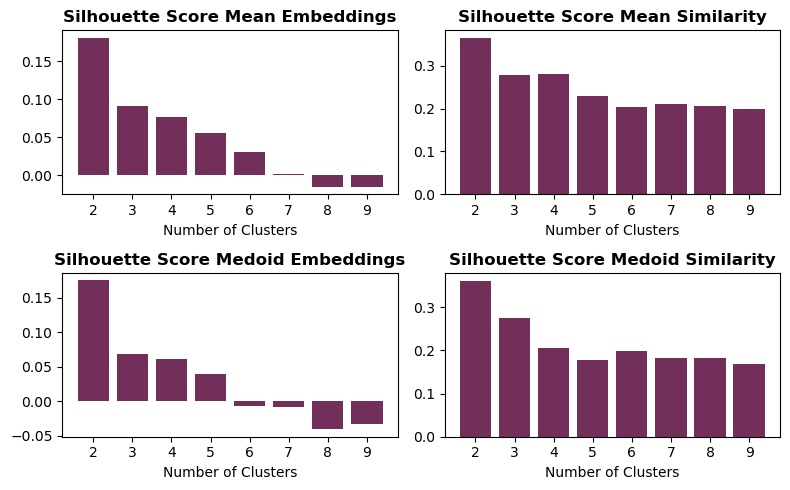

In [119]:
# List of K values
k_vec = [2, 3, 4, 5, 6, 7, 8, 9]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Plot each silhouette score in a subplot
axs[0, 0].bar(k_vec, silouette_scoresMeanEmbeddings, align='center', color='#722f59')
axs[0, 0].set_title('Silhouette Score Mean Embeddings', fontweight='bold')
axs[0, 0].set_xlabel('Number of Clusters')
axs[0, 0].set_xticks(k_vec)
axs[0, 1].bar(k_vec, silouette_scoresMeanSimilarity, align='center', color='#722f59')
axs[0, 1].set_title('Silhouette Score Mean Similarity', fontweight='bold')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_xticks(k_vec)
axs[1, 0].bar(k_vec, silouette_scoresMedoidEmbeddings, align='center', color='#722f59')
axs[1, 0].set_title('Silhouette Score Medoid Embeddings', fontweight='bold')
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_xticks(k_vec)
axs[1, 1].bar(k_vec, silouette_scoresMedoidSimilarity, align='center', color='#722f59')
axs[1, 1].set_title('Silhouette Score Medoid Similarity', fontweight='bold')
axs[1, 1].set_xlabel('Number of Clusters')
axs[1, 1].set_xticks(k_vec)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Osserviamo che la silhoutte score è molto alto in questo contesto "Other", con k = 2 nettamente vincitore

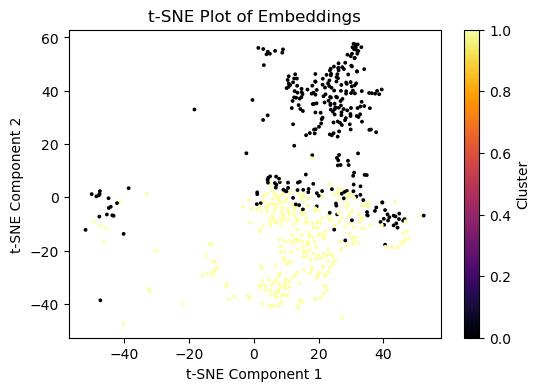

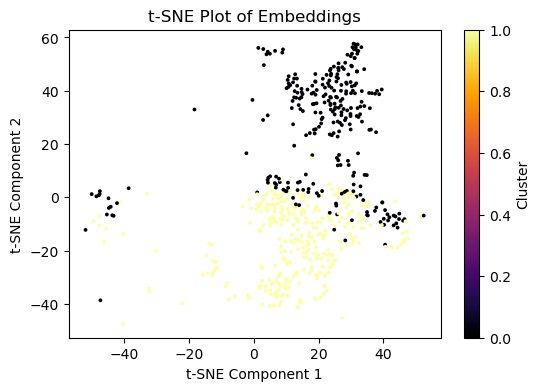

In [120]:
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids.fit(similarity_matrix)
clustersKMEDOIDSdoc2vec = kmedoids.labels_
centroids = similarity_matrix[kmedoids.medoid_indices_]

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(similarity_matrix)
clustersKMeans = kmeans.labels_

plt.figure(figsize=(6, 4))
plt.scatter(dfOther['EmbeddingsTsneDim0'], dfOther['EmbeddingsTsneDim1'], c=clustersKMEDOIDSdoc2vec, s =3, cmap='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(dfOther['EmbeddingsTsneDim0'], dfOther['EmbeddingsTsneDim1'], c=clustersKMeans, s=3,cmap ='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

Vediamo che sia kmeans che kmedoids danno pressoche gli stessi risultati.

Vediamo ora il clustering fatto con gli embeddings puri:

In [121]:
k_vec = [2,3,4,5,6,7,8,9]
silouette_scoresMedoidSimilarity = []
silouette_scoresMedoidEmbeddings=[]
silouette_scoresMeanSimilarity = []
silouette_scoresMeanEmbeddings = []


for k in k_vec:
    kmedoids = KMedoids(n_clusters=k, random_state=1)
    kmedoids.fit(emb3Other)
    clustersKMEDOIDSdoc2vec = kmedoids.labels_
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(emb3Other)
    clustersKMeans = kmeans.labels_
    #print(silhouette_score(emb3MiurSap, clustersKMEDOIDSdoc2vec),k,'kmedoids')
    silouette_scoresMedoidEmbeddings.append(silhouette_score(emb3Other, clustersKMEDOIDSdoc2vec))
    #print(silhouette_score(similarity_matrix, clustersKMEDOIDSdoc2vec),k,'\n')
    silouette_scoresMedoidSimilarity.append(silhouette_score(similarity_matrix, clustersKMEDOIDSdoc2vec))

    #print(silhouette_score(emb3MiurSap, clustersKMeans),k,'clustersKMeans')
    silouette_scoresMeanEmbeddings.append(silhouette_score(emb3Other, clustersKMeans))

    #print(silhouette_score(similarity_matrix, clustersKMeans),k,'\n')
    silouette_scoresMeanSimilarity.append(silhouette_score(similarity_matrix, clustersKMeans))

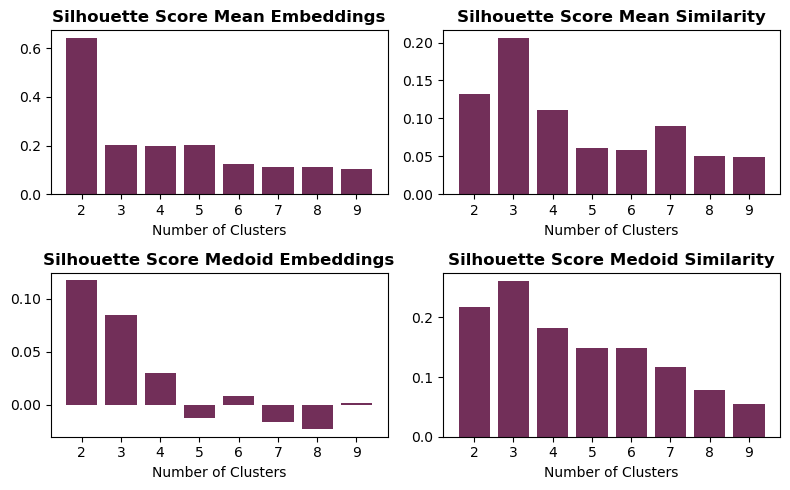

In [122]:
# List of K values
k_vec = [2, 3, 4, 5, 6, 7, 8, 9]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Plot each silhouette score in a subplot
axs[0, 0].bar(k_vec, silouette_scoresMeanEmbeddings, align='center', color='#722f59')
axs[0, 0].set_title('Silhouette Score Mean Embeddings', fontweight='bold')
axs[0, 0].set_xlabel('Number of Clusters')
axs[0, 0].set_xticks(k_vec)
axs[0, 1].bar(k_vec, silouette_scoresMeanSimilarity, align='center', color='#722f59')
axs[0, 1].set_title('Silhouette Score Mean Similarity', fontweight='bold')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_xticks(k_vec)
axs[1, 0].bar(k_vec, silouette_scoresMedoidEmbeddings, align='center', color='#722f59')
axs[1, 0].set_title('Silhouette Score Medoid Embeddings', fontweight='bold')
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_xticks(k_vec)
axs[1, 1].bar(k_vec, silouette_scoresMedoidSimilarity, align='center', color='#722f59')
axs[1, 1].set_title('Silhouette Score Medoid Similarity', fontweight='bold')
axs[1, 1].set_xlabel('Number of Clusters')
axs[1, 1].set_xticks(k_vec)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Notiamo che invece facendo clustering sugli embeddings viene k = 3 come miglior scelta di k! Vediamo graficamente:

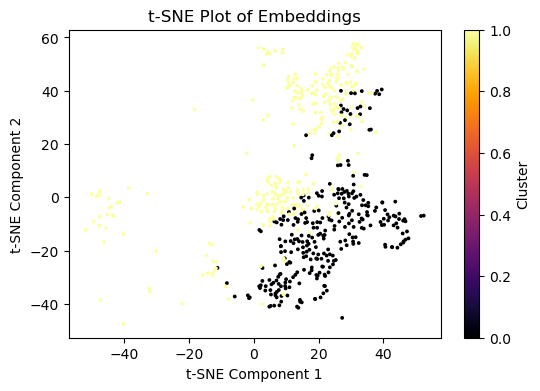

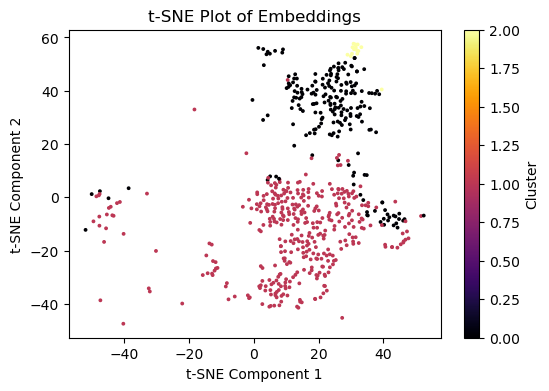

In [124]:
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids.fit(emb3Other)
clustersKMEDOIDSdoc2vec = kmedoids.labels_
centroids = similarity_matrix[kmedoids.medoid_indices_]

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(emb3Other)
clustersKMeans = kmeans.labels_

plt.figure(figsize=(6, 4))
plt.scatter(dfOther['EmbeddingsTsneDim0'], dfOther['EmbeddingsTsneDim1'], c=clustersKMEDOIDSdoc2vec, s =3, cmap='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(dfOther['EmbeddingsTsneDim0'], dfOther['EmbeddingsTsneDim1'], c=clustersKMeans, s=3,cmap ='inferno')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Valutazione Labels fatte da chatgpt su layer 1

In [125]:
df_E3C = pd.read_excel('df_E3C.xlsx')

In [126]:
df_E3C

Unnamed: 0        id                                               text  \
0            0  IT100002  Anna è una donna di 47 anni, vive con il figli...   
1            1  IT100003  Gabriele è un uomo di 53 anni, affetto dal 200...   
2            2  IT100010  È descritto il caso clinico di una donna di 84...   
3            3  IT100015  Si descrive il caso di una paziente di anni 52...   
4            4  IT100027  Un paziente di 83 anni nel dicembre 2006, rice...   
..         ...       ...                                                ...   
81          81  IT101493  Un ragazzo di 35 anni giunge all'osservazione ...   
82          82  IT101948  Una donna di 24 anni giunge all'attenzione med...   
83          83  IT102056  Donna - aa. 30\n\nAnamnesi Patologica\nAsporta...   
84          84  IT102057  Femmina - aa 37\n\nAnamnesi patologica remota\...   
85          85  IT102068  Maschio – a. 20\n\nAnamnesi patologica remota ...   

     age                                           symptoms gender  \
0   47.0  ['dolore retrosternale', 'sincope', 'dolore al...      F   
1   53.0  ['limitazione della funzione motoria', 'cadute...      M   
2   84.0  ['dolori osteoarticolari diffusi', 'febbricola...      F   
3   52.0                  ['insufficienza renale avanzata']      F   
4   83.0  ['disturbi urinari', 'metastasi ossee', 'progr...      M   
..   ...                                                ...    ...   
81  35.0  ['Bilateral lumbar pain', 'Increased intensity...      M   
82  24.0  ['Febbricola da 6 mesi', 'Dolore in regione la...      F   
83  30.0  ['Dolore addominale', 'Vomito biliare', 'Febbre']      F   
84  37.0  ['Episodi di dispepsia', 'Pirosi', 'Epigastral...      F   
85  20.0  ['Tensione addominale', 'Comparsa di massa pal...      M   

                      domain  \
0    Orthopedics, Cardiology   
1   Neurology, Endocrinology   
2    Pulmonology, Nephrology   
3                 Nephrology   
4                   Oncology   
..                       ...   
81                Nephrology   
82          Medicina interna   
83  Ginecologia e Ostetricia   
84         Gastroenterologia   
85                Addominale   

                                            diagnosis  outcome  Orthopedics  \
0   Piede torto congenito, Dissezione acuta dell'a...      NaN         True   
1   Distrofia muscolare di tipo 1, Diabete mellito...      NaN        False   
2   Alveolite allergica estrinseca, Glomerulonefri...      NaN        False   
3                         Glomerulonefrite membranosa      NaN        False   
4                                Carcinoma prostatico      NaN        False   
..                                                ...      ...          ...   
81       Renal enlargement with bilateral lumbar pain  Unknown        False   
82  Febbricola da 6 mesi, dolore in regione latero...  Unknown        False   
83  Addome acuto con dolore addominale, vomito bil...      NaN        False   
84  Gastropatia ed esofagopatia da reflusso alcali...      NaN        False   
85                                    Cisti vascolare      NaN        False   

    ...  Rheumatology  Psychiatry  Internal Medicine  Geriatrics  Urology  \
0   ...         False       False              False       False    False   
1   ...         False       False              False       False    False   
2   ...         False       False              False       False    False   
3   ...         False       False              False       False    False   
4   ...         False       False              False       False    False   
..  ...           ...         ...                ...         ...      ...   
81  ...         False       False              False       False    False   
82  ...         False       False               True       False    False   
83  ...         False       False              False       False    False   
84  ...         False       False              False       False    False   
85  ...         False       False

In [127]:
df_E3C.domain.unique()

array(['Orthopedics, Cardiology', 'Neurology, Endocrinology',
       'Pulmonology, Nephrology', 'Nephrology', 'Oncology',
       'Gastroenterology', 'Oncology/Hematology', 'Infectious Diseases',
       'Endocrinology', 'Rheumatology', 'Cardiology',
       'Cardiology, Oncology',
       'Gastroenterology, Cardiology, Vascular Surgery',
       'Neurology, Psychiatry', 'Infectious Diseases, Internal Medicine',
       'Orthopedics, Endocrinology, Geriatrics', 'Neurology',
       'Pulmonology', 'Cardiology and Vascular Surgery',
       'Medicina Interna', 'Cardiologia', 'Urologia', 'Gastroenterologia',
       'Infettivologia', 'Ematologia', 'Internal Medicine',
       'Emergency Medicine', 'Gastroenterology and Pulmonology',
       'Endocrinology and Gastroenterology', 'Toxicology',
       'Internal Medicine - Gastric Cancer',
       'Emergency Medicine - Acute Appendicitis',
       'Emergency Medicine - Bronchopneumonia',
       'Neurology - Anoxic Brain Injury',
       'Infectious Disease

In [56]:
# sono troppe / avere la doppia/tripla categoria è difficile da gestire

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


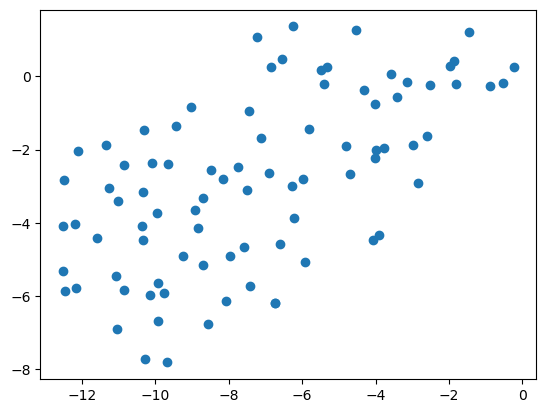

In [128]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb1)  # embeddings è la tua matrice di embedding
        
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1])

In [129]:
df_E3C['Unnamed: 0']

0      0
1      1
2      2
3      3
4      4
      ..
81    81
82    82
83    83
84    84
85    85
Name: Unnamed: 0, Length: 86, dtype: int64

In [130]:
df_E3C[df_E3C['domain']=='Cardiology']['Unnamed: 0']

12    12
13    13
44    44
45    45
46    46
Name: Unnamed: 0, dtype: int64

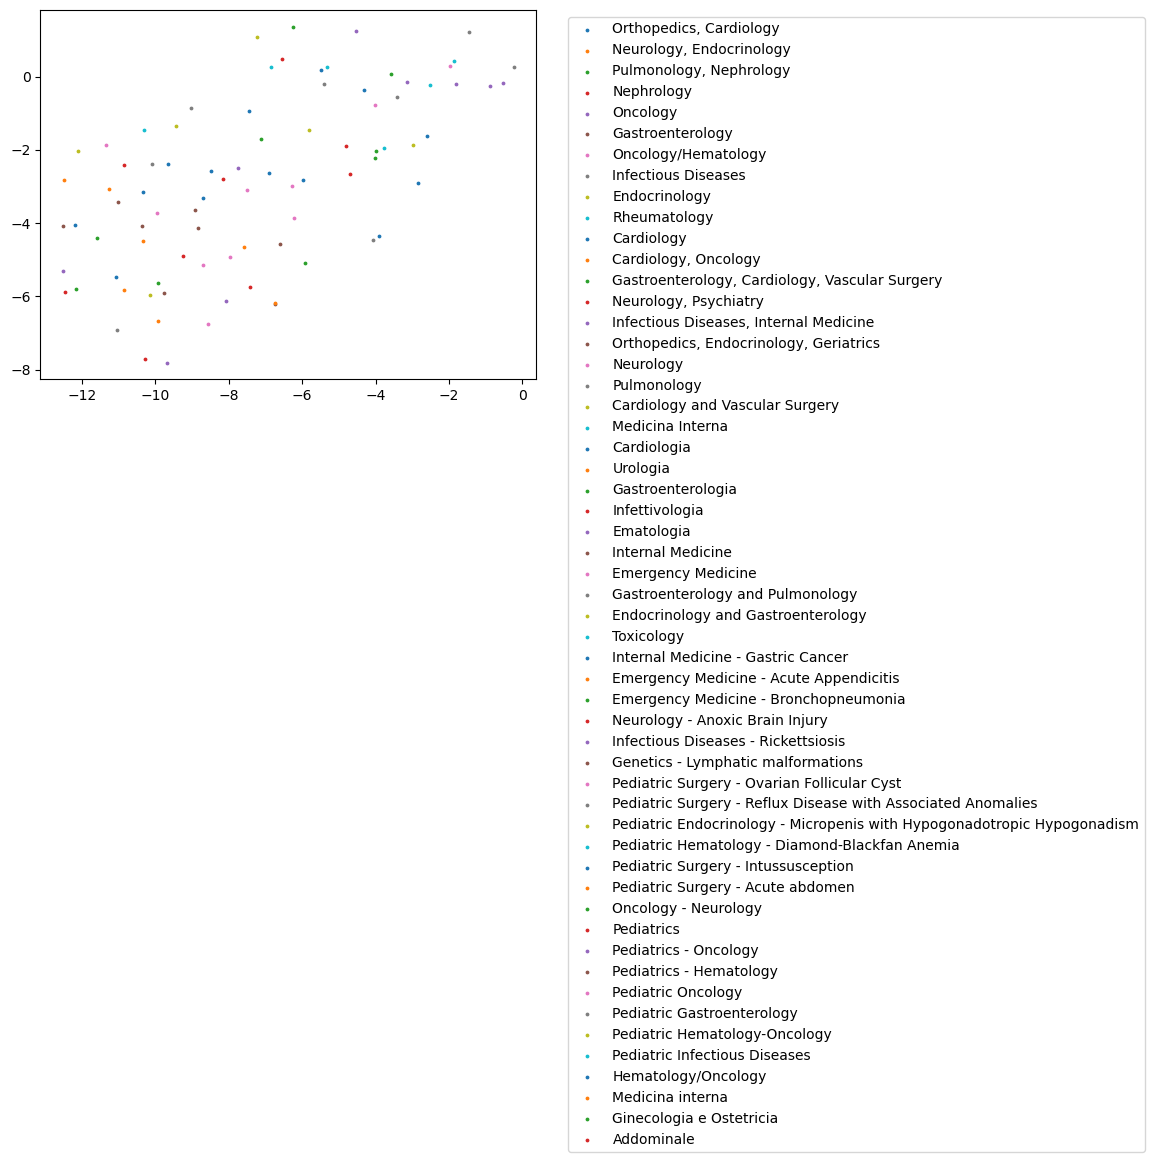

In [131]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for domain in df_E3C['domain'].unique():
    domain_data = df_E3C[df_E3C['domain'] == domain]
    indices = domain_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], s=3, label=domain)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Fatto così non è utile perchè ci sono etichette che non sono in grado di prendere singolarmente.
Proviamo allora a prendere pediatric, cardiology e oncology e plottiamo singolarmente i punti che hanno ciò vs gli altri, sfruttando la contrast matrix di df_E3C

In [132]:
df_E3C.columns

Index(['Unnamed: 0', 'id', 'text', 'age', 'symptoms', 'gender', 'domain',
       'diagnosis', 'outcome', 'Orthopedics', 'Cardiology', 'Neurology',
       'Endocrinology', 'Pulmonology', 'Nephrology', 'Oncology',
       'Gastroenterology', 'Hematology', 'Infectious Diseases', 'Rheumatology',
       'Psychiatry', 'Internal Medicine', 'Geriatrics', 'Urology',
       'Toxicology', 'Genetics', 'Pediatrics', 'Outcome_2', 'last_sentences'],
      dtype='object')

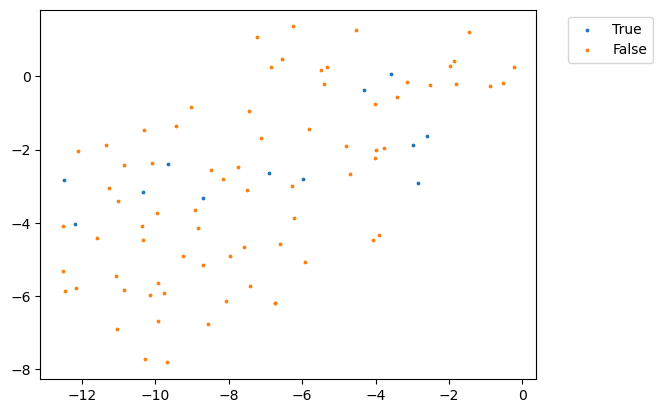

In [133]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Cardiology'].unique():
    truth_data = df_E3C[df_E3C['Cardiology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], s=3, label=truth)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

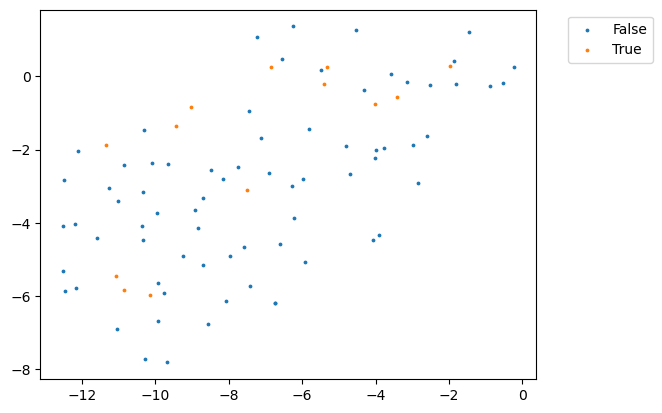

In [134]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Pediatrics'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], s=3, label=truth)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

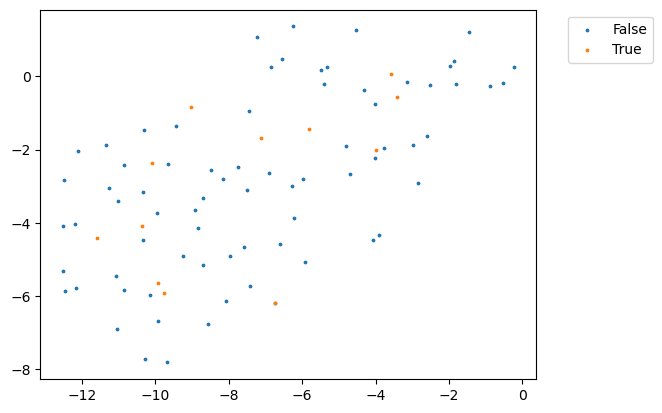

In [135]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Gastroenterology'].unique():
    truth_data = df_E3C[df_E3C['Gastroenterology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], s=3, label=truth)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

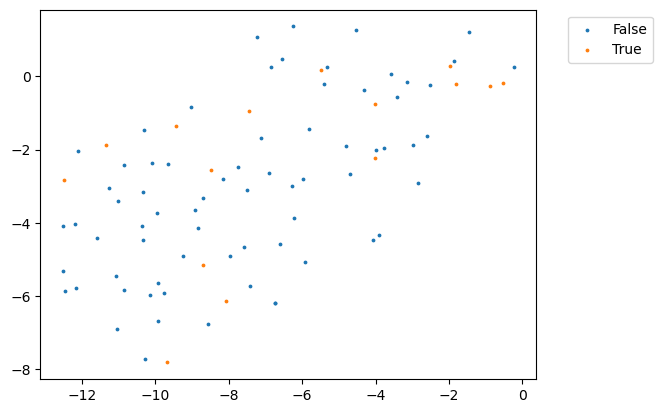

In [136]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], s=3, label=truth)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Vediamo se pca dà risultati diversi:

In [137]:
# Calcola PCA sui tuoi embedding
pca = PCA(n_components=2)  # Specifica il numero di componenti principali desiderate
embeddings_pca = pca.fit_transform(emb1)  # embeddings è la tua matrice di embedding

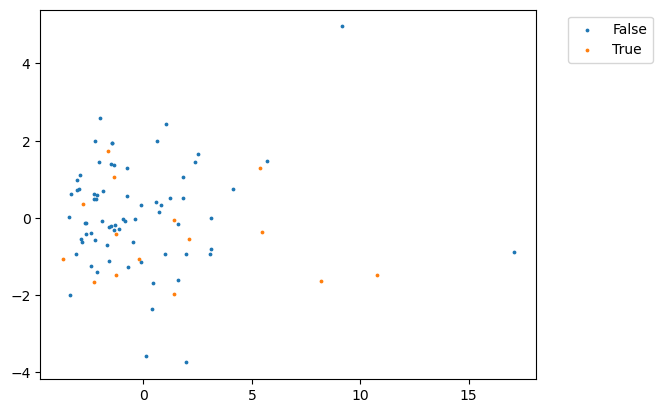

In [138]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    plt.scatter(embeddings_pca[indices, 0], embeddings_pca[indices, 1], s=3, label=truth)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Non cambia niente

# Modifiche 15 marzo in poi

Sulla base delle indicazioni datemi dal vittorio nella chiamata dell'8 marzo, (vedi mail lista TO DO, 8 marzo), utilizzo layer 1 e layer 3 assieme, per fare in modo di usare layer 1 come fonte di informazioni precise sulle entità mediche e layer 1 e layer 3 assieme per essere in grado di creare clusters migliori.

In [295]:
print(len(emb1and3),len(emb1),len(emb3))

2215 86 2129


In [301]:
len(emb1and3[0])

96

In [299]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne1and3 = tsne.fit_transform(emb1and3)  # embeddings è la tua matrice di embedding

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [300]:
import pandas as pd

df1 = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df1['Index'] = list(range(len(lista_source1)))
df1['Text'] = lista_testi1
df1['Length'] = [len(text) for text in df1['Text']]
df1['Source'] = lista_source1

df3 = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df3['Index'] = list(range(len(lista_source3)))
df3['Index'] = df3['Index']+86
df3['Text'] = lista_testi3
df3['Length'] = [len(text) for text in df3['Text']]
df3['Source'] = lista_source3
#df['EmbeddingsTsneDim0'] = embeddings_tsne1and3[:,0]
#df['EmbeddingsTsneDim1'] = embeddings_tsne1and3[:,1]

In [292]:
df1and3 = pd.concat([df1, df3], ignore_index=True)

df1and3['EmbeddingsTsneDim0'] = embeddings_tsne1and3[:,0]
df1and3['EmbeddingsTsneDim1'] = embeddings_tsne1and3[:,1]

In [143]:
df1and3['Layer'] = 'Layer3'
df1and3.loc[0:85,'Layer'] = 'Layer1'

Ho messo assieme in una dataframe sia layer 1 che layer 3, ora li divido sulla base di miurSap e Other come fatto in precedenza su questo notebook:

In [144]:
lista_source_short_layer1and3 = ['Miur','Sapienza Università di Roma']

lista_source_long_layer1and3 = [parola for parola in df1and3['Source'] if parola not in lista_source_short_layer1and3]
lista_source_long_layer1and3 = sorted(list(set(lista_source_long_layer1and3)))

In [145]:
df1and3MiurSap = df1and3[df1and3['Source'].isin(lista_source_short_layer1and3)]
df1and3Other = df1and3[df1and3['Source'].isin(lista_source_long_layer1and3)]

In [146]:
emb1and3Other = emb1and3[df1and3Other['Index']]
emb1and3MiurSap = emb1and3[df1and3MiurSap['Index']]

# Other
Lavoriamo ora su df1and3 Other:

Scelta del k con silhouette score:

ValueError: shape mismatch: objects cannot be broadcast to a single shape

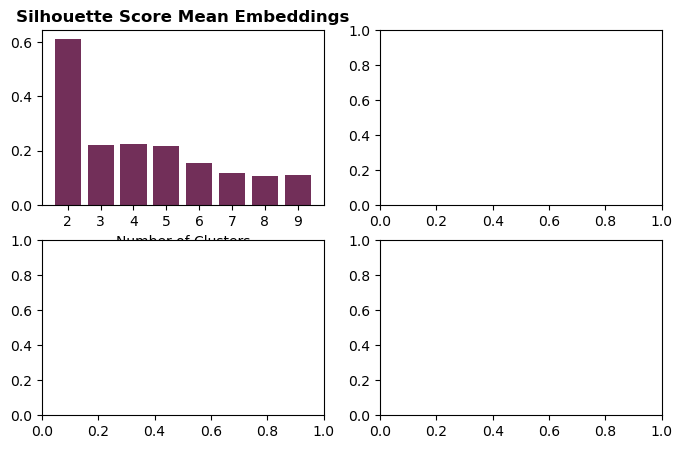

In [149]:
k_vec = [2,3,4,5,6,7,8,9]
silouette_scoresMeanEmbeddings = []


for k in k_vec:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(emb1and3Other)
    clustersKMeans = kmeans.labels_

    #print(silhouette_score(emb3MiurSap, clustersKMeans),k,'clustersKMeans')
    silouette_scoresMeanEmbeddings.append(silhouette_score(emb1and3Other, clustersKMeans))


# List of K values
k_vec = [2, 3, 4, 5, 6, 7, 8, 9]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Plot each silhouette score in a subplot
axs[0, 0].bar(k_vec, silouette_scoresMeanEmbeddings, align='center', color='#722f59')
axs[0, 0].set_title('Silhouette Score Mean Embeddings', fontweight='bold')
axs[0, 0].set_xlabel('Number of Clusters')
axs[0, 0].set_xticks(k_vec)
axs[0, 1].bar(k_vec, silouette_scoresMeanSimilarity, align='center', color='#722f59')
axs[0, 1].set_title('Silhouette Score Mean Similarity', fontweight='bold')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_xticks(k_vec)
axs[1, 0].bar(k_vec, silouette_scoresMedoidEmbeddings, align='center', color='#722f59')
axs[1, 0].set_title('Silhouette Score Medoid Embeddings', fontweight='bold')
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_xticks(k_vec)
axs[1, 1].bar(k_vec, silouette_scoresMedoidSimilarity, align='center', color='#722f59')
axs[1, 1].set_title('Silhouette Score Medoid Similarity', fontweight='bold')
axs[1, 1].set_xlabel('Number of Clusters')
axs[1, 1].set_xticks(k_vec)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


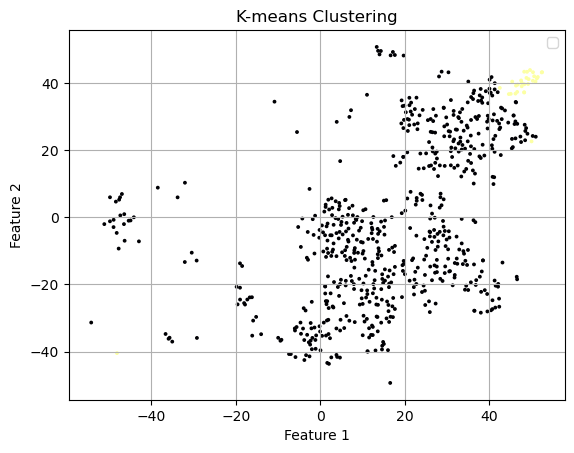

In [147]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(emb1and3Other)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(df1and3Other['EmbeddingsTsneDim0'], df1and3Other['EmbeddingsTsneDim1'], c=labels, cmap='inferno', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Uso codice dell'8 marzo per colorare i documenti etichettati col domain da chatgpt, ma li visualizzo sull'embedding tsne non solo di layer 1 ma di layer 1 and 3 assieme, vedendo che tipi di cluster si formano!

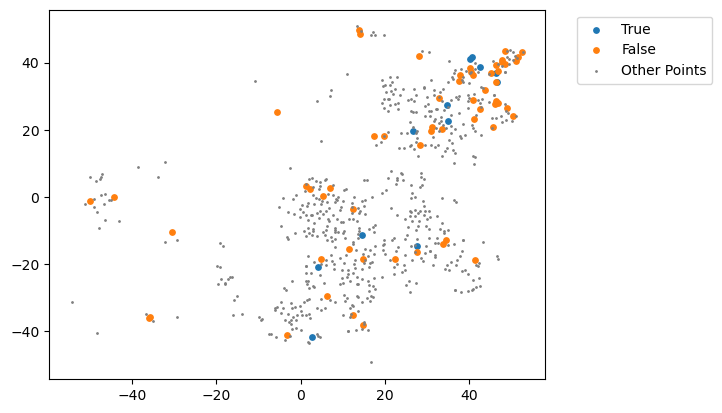

In [150]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Cardiology'].unique():
    truth_data = df_E3C[df_E3C['Cardiology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

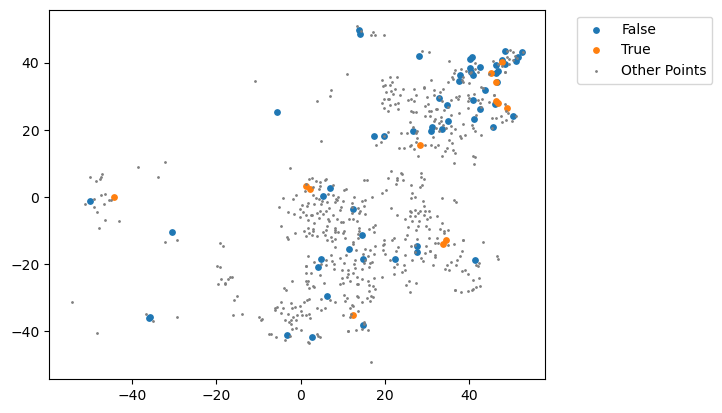

In [151]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Pediatrics'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

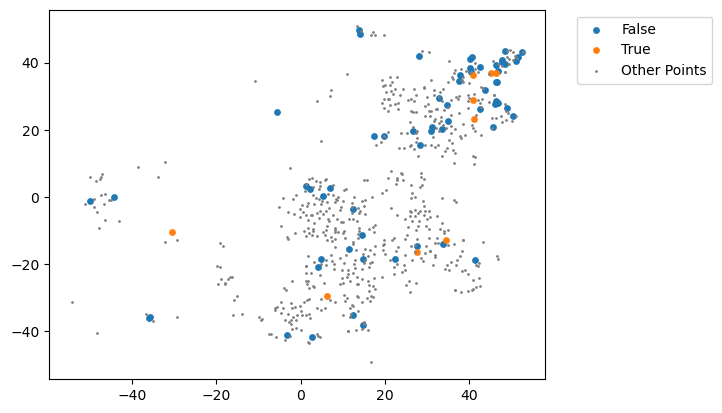

In [152]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Gastroenterology'].unique():
    truth_data = df_E3C[df_E3C['Gastroenterology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

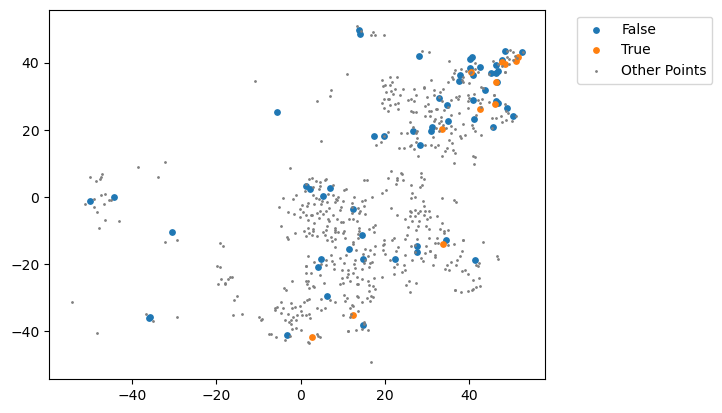

In [153]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()  # Assume che 'Unnamed: 0' contenga gli indici corrispondenti
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Alla luce di questi risultati sembra che l'appartenenza ai clusters sia dettata in maniera scarsa da il dominio medico

# MiurSap
Vediamo ora se otteniamo dei risultati diversi con MiurSap invece che Other:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


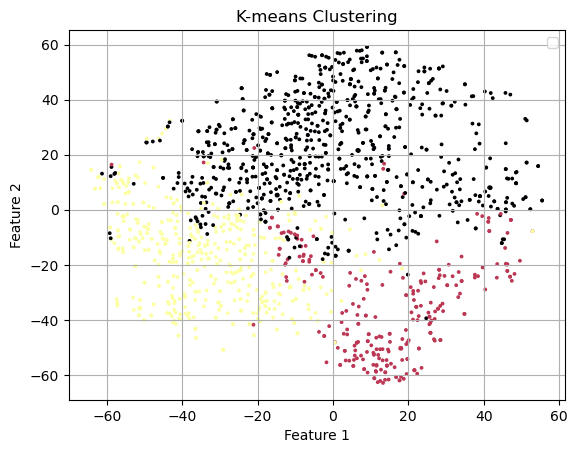

In [81]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(emb1and3MiurSap)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(df1and3MiurSap['EmbeddingsTsneDim0'], df1and3MiurSap['EmbeddingsTsneDim1'], c=labels, cmap='inferno', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Uso codice dell'8 marzo per colorare i documenti etichettati col domain da chatgpt, ma li visualizzo sull'embedding tsne non solo di layer 1 ma di layer 1 and 3 assieme, vedendo che tipi di cluster si formano!

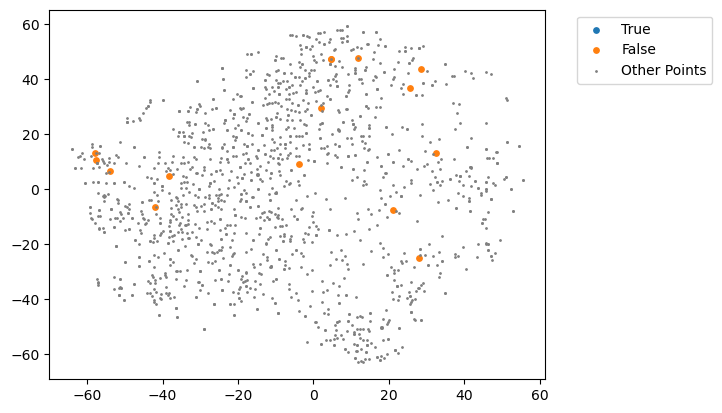

In [82]:
import matplotlib.pyplot as plt

colormap = 'viridis'
for truth in df_E3C['Cardiology'].unique():
    truth_data = df_E3C[df_E3C['Cardiology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3MiurSap[df1and3MiurSap['Layer']=='Layer1']['Index']
    indicesMiurSap = [index for index in indices if index in indicesLayer1]
    plt.scatter(embeddings_tsne1and3[indicesMiurSap, 0], embeddings_tsne1and3[indicesMiurSap, 1], s=15, label=truth)

indicesLayer3 = df1and3MiurSap[df1and3MiurSap['Layer']=='Layer3']['Index']
plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

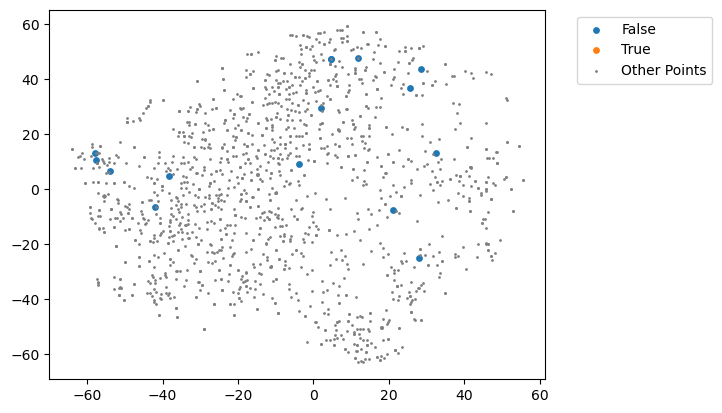

In [83]:
colormap = 'viridis'
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Pediatrics'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3MiurSap[df1and3MiurSap['Layer']=='Layer1']['Index']
    indicesMiurSap = [index for index in indices if index in indicesLayer1]
    plt.scatter(embeddings_tsne1and3[indicesMiurSap, 0], embeddings_tsne1and3[indicesMiurSap, 1], s=15, label=truth)

indicesLayer3 = df1and3MiurSap[df1and3MiurSap['Layer']=='Layer3']['Index']
plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

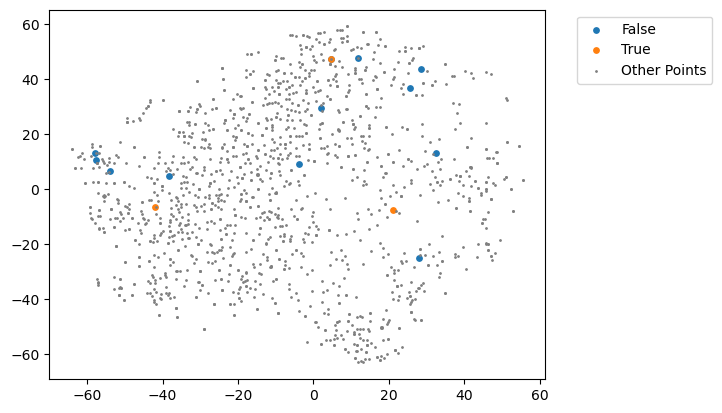

In [84]:
colormap = 'viridis'
for truth in df_E3C['Gastroenterology'].unique():
    truth_data = df_E3C[df_E3C['Gastroenterology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3MiurSap[df1and3MiurSap['Layer']=='Layer1']['Index']
    indicesMiurSap = [index for index in indices if index in indicesLayer1]
    plt.scatter(embeddings_tsne1and3[indicesMiurSap, 0], embeddings_tsne1and3[indicesMiurSap, 1], s=15, label=truth)

indicesLayer3 = df1and3MiurSap[df1and3MiurSap['Layer']=='Layer3']['Index']
plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

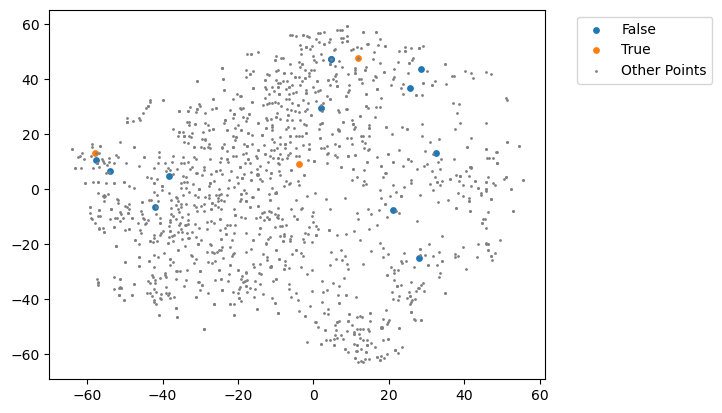

In [85]:
colormap = 'viridis'
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3MiurSap[df1and3MiurSap['Layer']=='Layer1']['Index']
    indicesMiurSap = [index for index in indices if index in indicesLayer1]
    plt.scatter(embeddings_tsne1and3[indicesMiurSap, 0], embeddings_tsne1and3[indicesMiurSap, 1], s=15, label=truth)

indicesLayer3 = df1and3MiurSap[df1and3MiurSap['Layer']=='Layer3']['Index']
plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Alla luce di questi risultati sembra che l'appartenenza ai clusters sia dettata in maniera scarsa da il dominio medico

# Tabelle con numero di documenti con stesso dominio nei vari clusters

Oss, lo faccio solo su Other perchè miur sap ha pochi dati a disposizione.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


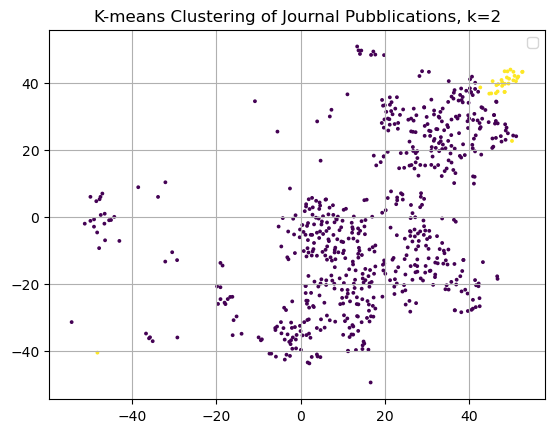

In [161]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(emb1and3Other)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(df1and3Other['EmbeddingsTsneDim0'], df1and3Other['EmbeddingsTsneDim1'], c=labels, s=3)
# Plot cluster centroids

plt.title('K-means Clustering of Journal Pubblications, k=2')
plt.legend()
plt.grid(True)

plt.savefig('immagini/clusteringJournal.svg')
plt.savefig('immagini\clusteringJournal.eps')

plt.show()

Uso codice dell'8 marzo per colorare i documenti etichettati col domain da chatgpt, ma li visualizzo sull'embedding tsne non solo di layer 1 ma di layer 1 and 3 assieme, vedendo che tipi di cluster si formano!

Cardiology

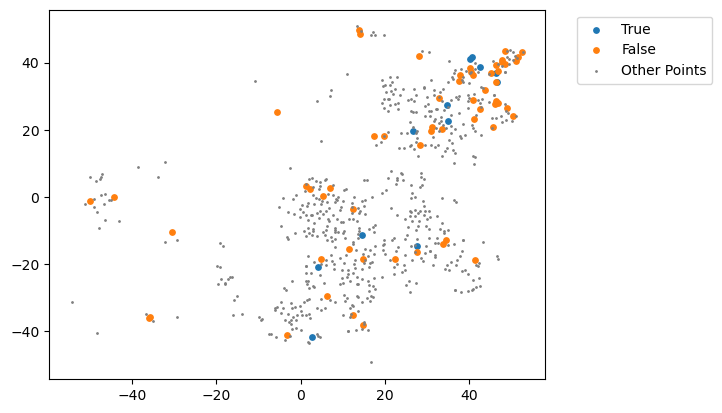

In [155]:
import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Cardiology'].unique():
    truth_data = df_E3C[df_E3C['Cardiology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

labelsDic = {}
for i, label in enumerate(labels):
    labelsDic[df1and3Other.iloc[i,0]] = label

Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

In [156]:
dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

           False  True  Other
labelsDic                    
0             49    10    583
1             10     2     18


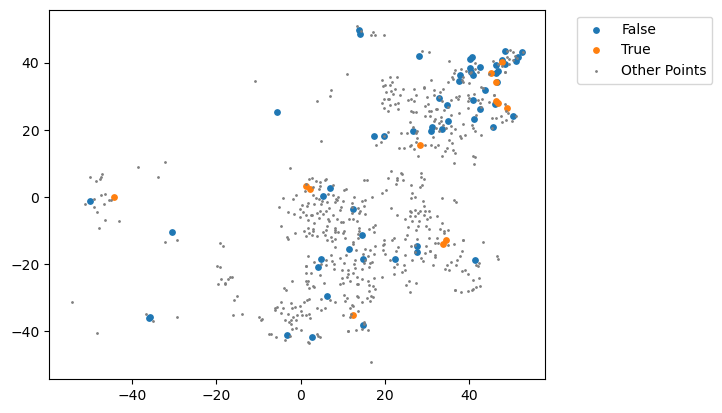

           False  True  Other
labelsDic                    
0             48    11    583
1             10     2     18


In [157]:
#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Pediatrics'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

labelsDic = {}
for i, label in enumerate(labels):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

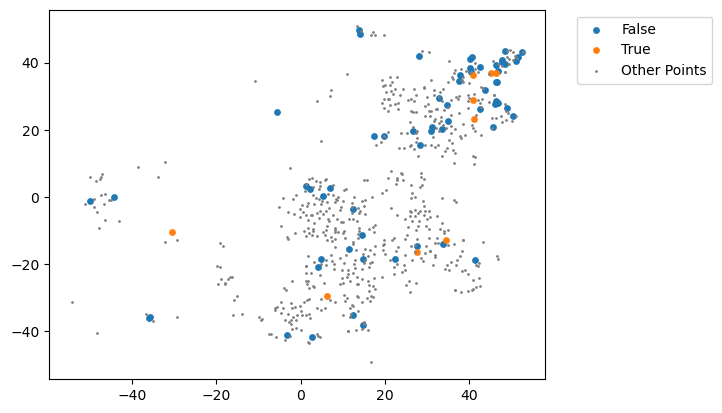

           False  True  Other
labelsDic                    
0             52     7    583
1             10     2     18


In [158]:
#Gastroenterology

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Gastroenterology'].unique():
    truth_data = df_E3C[df_E3C['Gastroenterology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

labelsDic = {}
for i, label in enumerate(labels):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

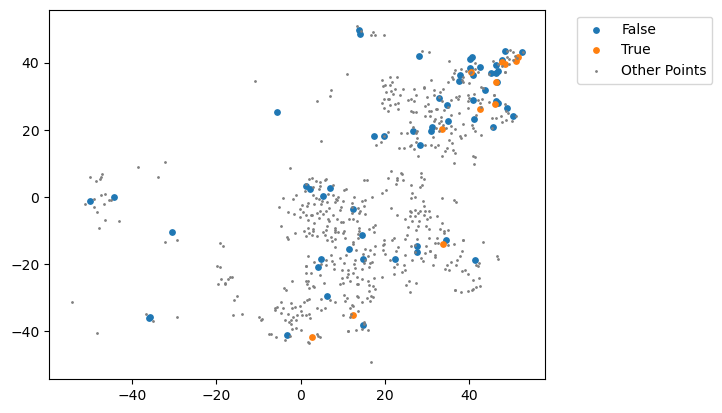

           False  True  Other
labelsDic                    
0             51     8    583
1              8     4     18


In [159]:
#Oncology

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

labelsDic = {}
for i, label in enumerate(labels):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

# Oss, vediamo se con labels di clustering prodotte da Hclust cambia qualcosa...

Numero di cluster: 3
Etichette dei cluster: [1 2 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 2 1 1 1 0 0 1 1 1 1
 2 0 1 0 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 2 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 0 2 0 1 0 1 0 1 0 0 2 1 1 0 1 0 0 0 0 2 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 2 2 0 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 2 1 0 0 2 0 0 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 2 0 0 0 1 1 1 0 0 0 0 0 2 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 2 0 1 1 0 0
 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 1 1 2 0 0 2 1 1 0 1 0 0 0 0 0 0 0 2 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 2 1 0 1 1 1 2 0 1 0 0 1 2 2 0
 0 1 0 0 1 2 0 0 0 1 0 1 1 0 0 2 0 1 0 1 1 1 0 0 2 1 1 2 1 0 0 0 0 1 0 0 0
 1 0 1 0 1 0 1 2 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 2 1 0 0 0 1 1 0
 0 1 0 0 1 2 2 0 0 1 1 1 2 0 0 2 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1
 0 0 2 0 2 1 1 1 1 1 2 1 1 0 1 2 0 1 2 0 1 1 0 0 0 0 1 0

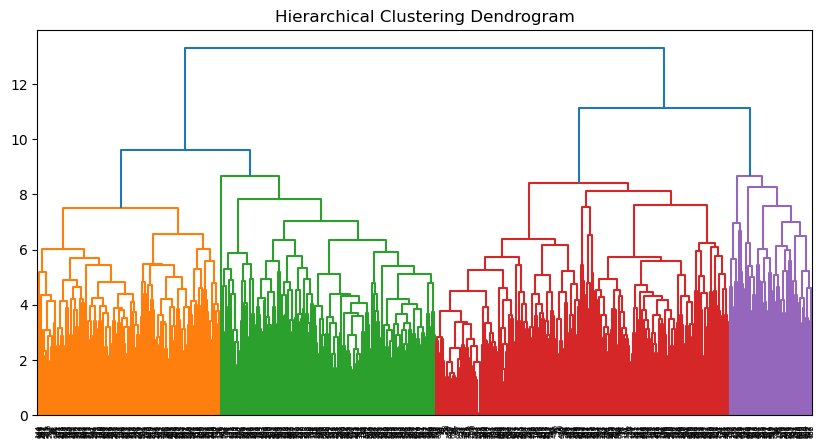

In [92]:
similarity_matrix = cosine_similarity(emb1and3Other)
Z = linkage(similarity_matrix, method='average') # complete linkage mi sembra il migliore
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
from scipy.cluster.hierarchy import fcluster

max_d = 10  # Altezza di taglio del dendrogramma
clustersHierarchicalInfoGraph = fcluster(Z, max_d, criterion='distance')-1

num_clusters = len(set(clustersHierarchicalInfoGraph))
print(f"Numero di cluster: {num_clusters}")
print("Etichette dei cluster:", clustersHierarchicalInfoGraph)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


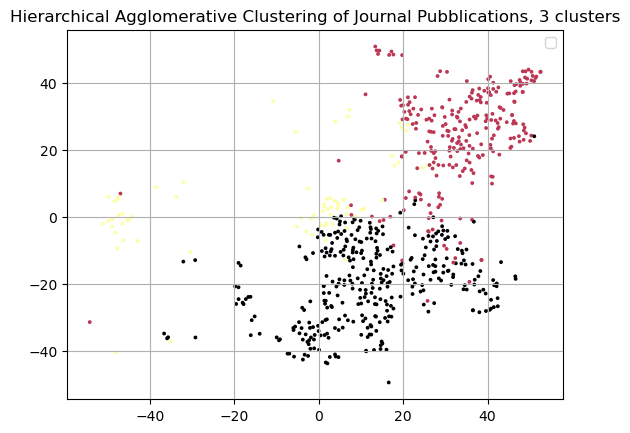

In [162]:
plt.scatter(df1and3Other['EmbeddingsTsneDim0'], df1and3Other['EmbeddingsTsneDim1'], c=clustersHierarchicalInfoGraph, cmap='inferno', s=3)
# Plot cluster centroids

plt.title('Hierarchical Agglomerative Clustering of Journal Pubblications, 3 clusters')
plt.legend()
plt.grid(True)

plt.savefig('immagini/clusteringJournalHCLUST.svg')
plt.savefig('immagini\clusteringJournalHCLUST.eps')
plt.legend()
plt.grid(True)
plt.show()

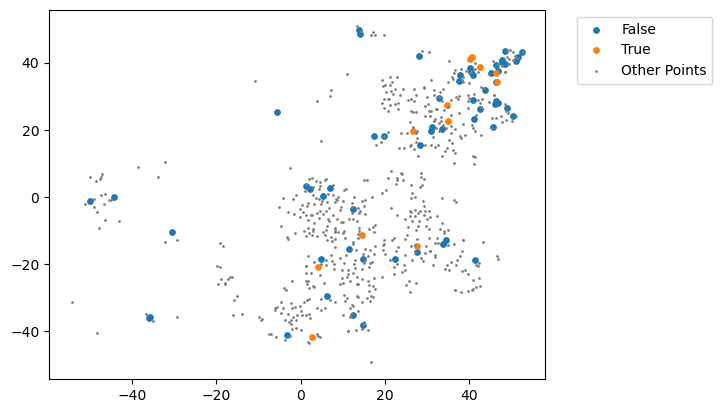

In [173]:
import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Cardiology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

In [95]:
dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

           False  True  Other
labelsDic                    
0             16     4    325
1             35     8    212
2              8     0     64


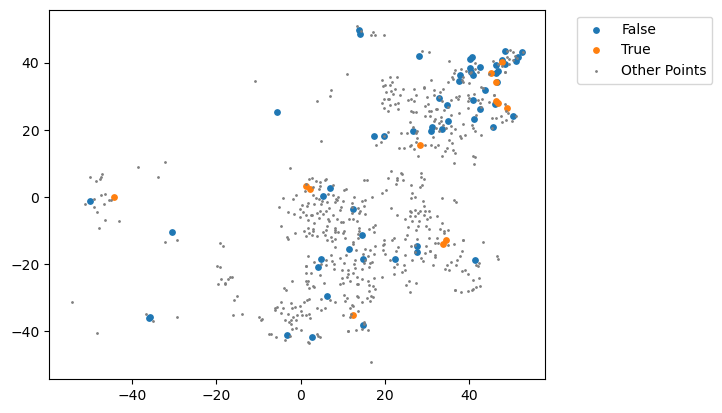

           False  True  Other
labelsDic                    
0             17     3    325
1             36     7    212
2              5     3     64


In [96]:
#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Pediatrics'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

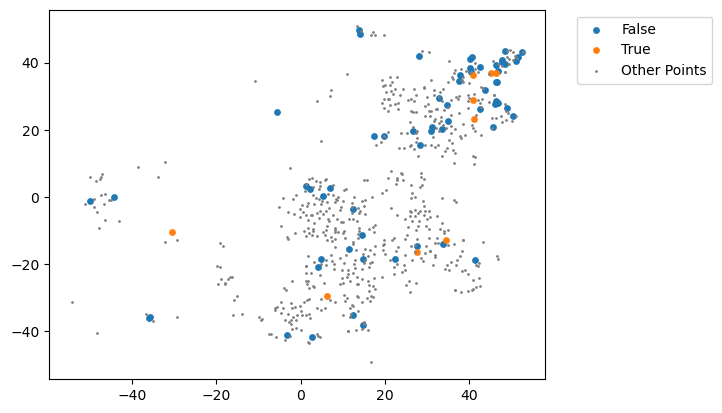

           False  True  Other
labelsDic                    
0             17     3    325
1             38     5    212
2              7     1     64


In [97]:
#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Gastroenterology'].unique():
    truth_data = df_E3C[df_E3C['Gastroenterology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

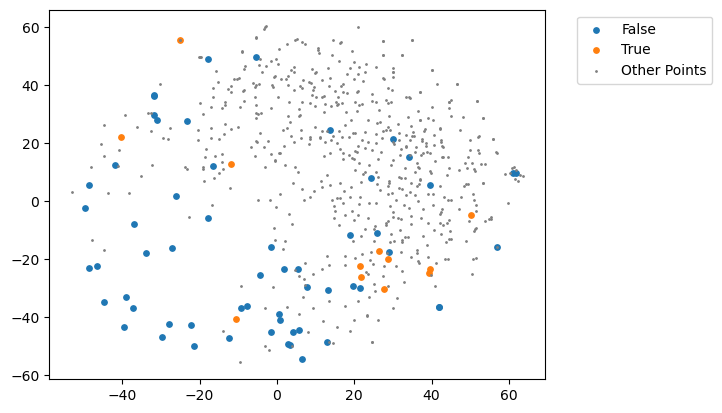

           False  True  Other
labelsDic                    
0             17     3    325
1             34     9    212
2              8     0     64


In [294]:
#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    plt.scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

plt.scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           False  True  Other
labelsDic                    
0             16     4    325
1             35     8    212
2              8     0     64
           False  True  Other
labelsDic                    
0             17     3    325
1             36     7    212
2              5     3     64
           False  True  Other
labelsDic                    
0             17     3    325
1             38     5    212
2              7     1     64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


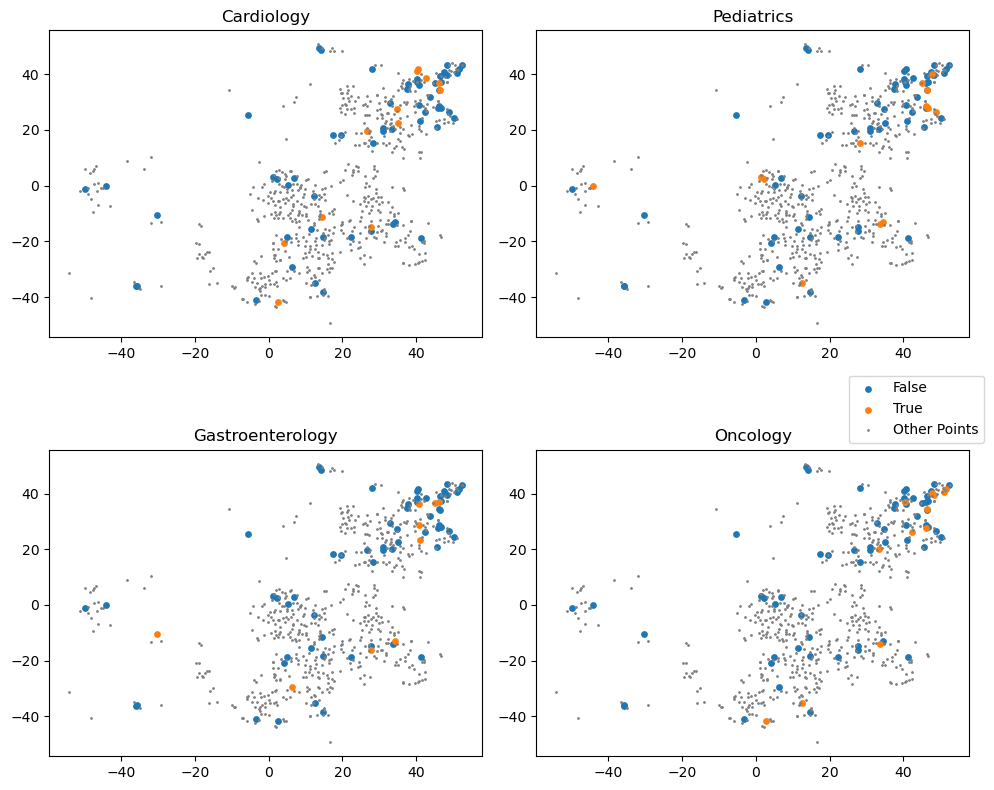

           False  True  Other
labelsDic                    
0             17     3    325
1             34     9    212
2              8     0     64


In [302]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Cardiology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[0, 0].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

#axs[0, 0].scatter(x, y, c=colors, s=sizes, alpha=0.5)

axs[0, 0].set_title('Cardiology')    

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[0, 0].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Pediatrics'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[0, 1].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[0, 1].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[0, 1].set_title('Pediatrics')    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Gastroenterology'].unique():
    truth_data = df_E3C[df_E3C['Gastroenterology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[1, 0].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[1, 0].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[1, 0].set_title('Gastroenterology')    

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[1, 1].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[1, 1].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[1, 1].set_title('Oncology')    

plt.gcf().set_size_inches(10, 8)  # Imposta le dimensioni della figura
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/domainLabelsChatGPT.svg')
plt.savefig('immagini\domainLabelsChatGPT.eps')
plt.show()

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)



# Faccio stesse analisi ma con doc2vec!

In [238]:
import pickle
import numpy as np

with open('FilePickles\corpusParoleInutiliStemming.pkl', 'rb') as file:
    # Carica i dati dal file
    corpus_filtrato = pickle.load(file)
#len(corpus_filtrato[0])

with open('FilePickles\corpusParoleInutiliStemming_layer1.pkl', 'rb') as file:
    # Carica i dati dal file
    corpus_filtrato1 = pickle.load(file)
#len(corpus_filtrato[0])



with open('FilePickles\modeldoc2vec_senza_AIFA.pkl', 'rb') as file:
    model = pickle.load(file)

embedding_docs1 = []
for doc in corpus_filtrato1:
    vector = model.infer_vector(doc)
    embedding_docs1.append(vector)


with open('FilePickles\embedding_docs3doc2vec_senza_AIFA.pkl', 'rb') as file:
    embedding_docs3 = pickle.load(file)

In [239]:
len(embedding_docs1)

86

In [237]:
2129+86

2215

In [240]:
embedding_docs1.extend(embedding_docs3)

In [246]:
len(emb1and3)

2215

In [250]:
emb1and3 = embedding_docs1.copy()

In [247]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne1and3 = tsne.fit_transform(emb1and3)  # embeddings è la tua matrice di embedding

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           False  True  Other
labelsDic                    
0             16     4    325
1             35     8    212
2              8     0     64
           False  True  Other
labelsDic                    
0             17     3    325
1             36     7    212
2              5     3     64
           False  True  Other
labelsDic                    
0             17     3    325
1             38     5    212
2              7     1     64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


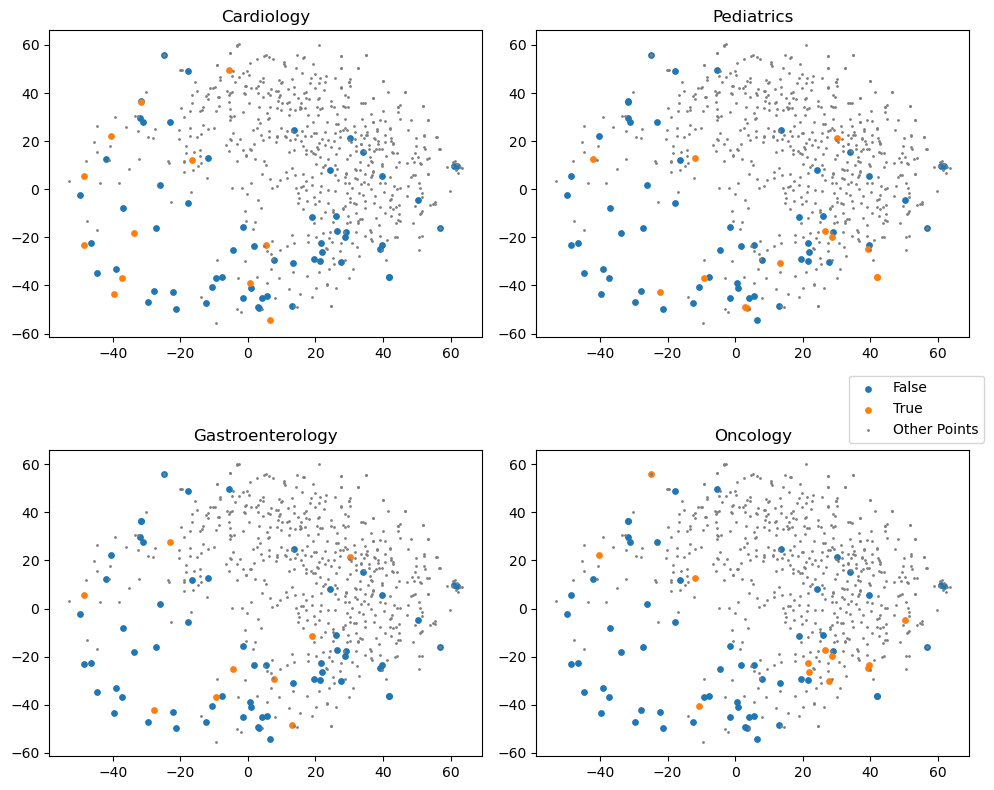

           False  True  Other
labelsDic                    
0             17     3    325
1             34     9    212
2              8     0     64


In [251]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Cardiology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[0, 0].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

#axs[0, 0].scatter(x, y, c=colors, s=sizes, alpha=0.5)

axs[0, 0].set_title('Cardiology')    

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[0, 0].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Pediatrics'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[0, 1].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[0, 1].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[0, 1].set_title('Pediatrics')    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Gastroenterology'].unique():
    truth_data = df_E3C[df_E3C['Gastroenterology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[1, 0].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[1, 0].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[1, 0].set_title('Gastroenterology')    

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3Other[df1and3Other['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[1, 1].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3Other[df1and3Other['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[1, 1].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[1, 1].set_title('Oncology')    

plt.gcf().set_size_inches(10, 8)  # Imposta le dimensioni della figura
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/domainLabelsChatGPT.svg')
plt.savefig('immagini\domainLabelsChatGPT.eps')
plt.show()

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3Other.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)


Prima ho plottato other, ora voglio plottare tutto assieme!

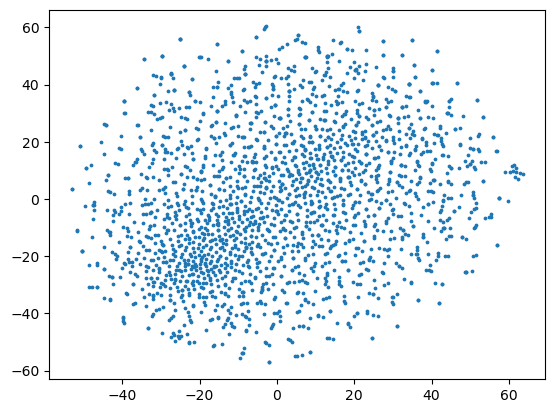

In [255]:
plt.scatter(embeddings_tsne1and3[:,0],embeddings_tsne1and3[:,1], s =3)
plt.show()

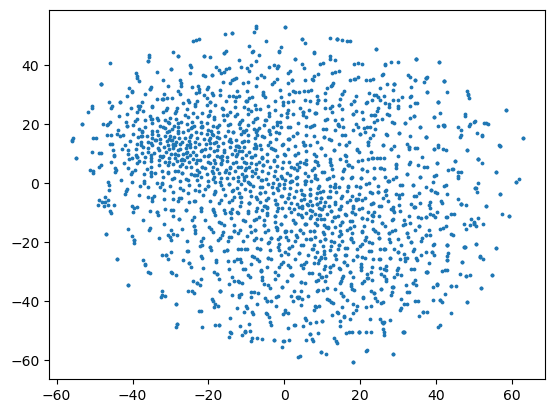

In [269]:
plt.scatter(embeddings_tsne3[:,0],embeddings_tsne3[:,1], s =3)
plt.show()

In [262]:
embeddings_tsne3.shape

(2129, 2)

In [270]:
df['EmbeddingsTsneDim0'] = embeddings_tsne3[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne3[:,1]

In [271]:
df

Index                                               Text  Length  \
0         0  C.C. iniziava a fare dialisi all’età di 17 ann...    4372   
1         1  I.Z. è un giovane di 22 anni. Pochi giorni pri...    6579   
2         2  Nel giugno 2007 presso la Struttura Complessa ...    4478   
3         3  Donna di 75 anni affetta da diabete mellito di...    2745   
4         4  Nel settembre del 2008 giunge alla nostra osse...    5750   
...     ...                                                ...     ...   
2124   2124  Femmina - aa. 77 –\n\nAnamnesi patologica remo...   13387   
2125   2125  1° caso clinico\n\nFemmina - aa. 77\nAnamnesi ...    5799   
2126   2126  Maschio- aa. 52\n\nAnamnesi patologica remota\...    4758   
2127   2127  femmina, aa. 86\n\nAnamnesi patologica.\nprece...    4888   
2128   2128  Maschio - età aa. 49\n\nAnamnesi Patologica Re...    5395   

                                              Source  ColorvecLunghezza  \
0     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
1     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
2     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
3     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
4     GCND Giornale di Clinica Nefrologica e Dialisi                  1   
...                                              ...                ...   
2124               Prof. Dr. Francescopaolo Mattioli                  1   
2125               Prof. Dr. Francescopaolo Mattioli                  1   
2126               Prof. Dr. Francescopaolo Mattioli                  1   
2127               Prof. Dr. Francescopaolo Mattioli                  1   
2128               Prof. Dr. Francescopaolo Mattioli                  1   

      ColorvecSource  EmbeddingsTsneDim0  EmbeddingsTsneDim1 VecLunghezza  
0                  1           56.778084           12.639311        Lungo  
1                  1           56.677433           12.851571        Lungo  
2                  1           56.816456           12.558680        Lungo  
3                  1          -32.096275          -37.961399        Lungo  
4                  1           30.113434          -18.776047        Lungo  
...              ...                 ...                 ...          ...  
2124               1           48.698959           19.529943        Lungo  
2125               1           53.640137           20.118196        Lungo  
2126               1           50.319866           20.944981        Lungo  
2127               1           48.982224           19.944483        Lungo  
2128               1           50.151020           20.634764        Lungo  

[2129 rows x 9 columns]

In [267]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne3 = tsne.fit_transform(embedding_docs3)  # embeddings è la tua matrice di embedding

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


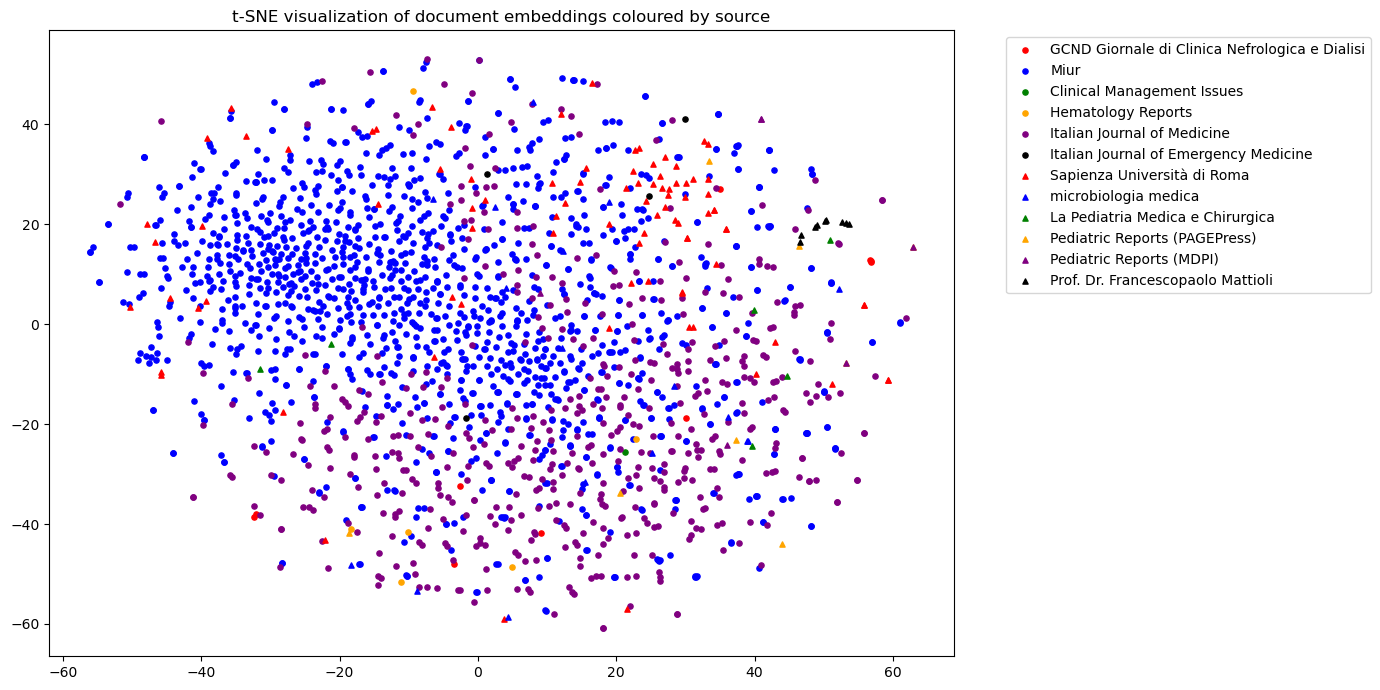

In [282]:
colori = ['red', 'blue', 'green', 'orange', 'purple','black']
stili = ['o', '^', 's', 'x', '*']

for i, source in enumerate(df['Source'].unique()):
    colore = colori[i%6]
    if i <6:
        stile = 'o'
    if i >=6:
        stile = '^'
    

    
    plt.scatter(df[df['Source'] == source]['EmbeddingsTsneDim0'], 
                df[df['Source'] == source]['EmbeddingsTsneDim1'], 
                s=14, label=source, c = colore ,marker =stile)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(14, 7)  # Imposta le dimensioni della figura
plt.title('t-SNE visualization of document embeddings coloured by source')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/sources_layer3doc2vec.svg')
plt.savefig('immagini\sources_layer3doc2vec.eps')
plt.show()

In [274]:
df1and3

Index                                               Text  Length  \
0         0  Anna è una donna di 47 anni, vive con il figli...    3705   
1         1  Gabriele è un uomo di 53 anni, affetto dal 200...    2829   
2         2  È descritto il caso clinico di una donna di 84...    3388   
3         3  Si descrive il caso di una paziente di anni 52...    2844   
4         4  Un paziente di 83 anni nel dicembre 2006, rice...    3829   
...     ...                                                ...     ...   
2210   2210  Femmina - aa. 77 –\n\nAnamnesi patologica remo...   13387   
2211   2211  1° caso clinico\n\nFemmina - aa. 77\nAnamnesi ...    5799   
2212   2212  Maschio- aa. 52\n\nAnamnesi patologica remota\...    4758   
2213   2213  femmina, aa. 86\n\nAnamnesi patologica.\nprece...    4888   
2214   2214  Maschio - età aa. 49\n\nAnamnesi Patologica Re...    5395   

                                              Source  EmbeddingsTsneDim0  \
0                                          AboutOpen           42.566364   
1                                          AboutOpen          -49.797409   
2     GCND Giornale di Clinica Nefrologica e Dialisi           50.355373   
3     GCND Giornale di Clinica Nefrologica e Dialisi           37.428043   
4                  Argomenti di Oncologia Geriatrica           51.020744   
...                                              ...                 ...   
2210               Prof. Dr. Francescopaolo Mattioli           49.386883   
2211               Prof. Dr. Francescopaolo Mattioli           36.444237   
2212               Prof. Dr. Francescopaolo Mattioli            5.045422   
2213               Prof. Dr. Francescopaolo Mattioli            1.306728   
2214               Prof. Dr. Francescopaolo Mattioli           30.397758   

      EmbeddingsTsneDim1   Layer  
0              38.552975  Layer1  
1              -1.198812  Layer1  
2              24.227552  Layer1  
3              34.645412  Layer1  
4              40.399921  Layer1  
...                  ...     ...  
2210           41.151325  Layer3  
2211          -14.046317  Layer3  
2212           -1.377022  Layer3  
2213            3.763258  Layer3  
2214           43.192192  Layer3  

[2215 rows x 7 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           False  True  Other
labelsDic                    
0.0           17     5    323
1.0           49     7    199
2.0            8     0     64
           False  True  Other
labelsDic                    
0.0           20     2    323
1.0           45    11    199
2.0            8     0     64
           False  True  Other
labelsDic                    
0.0           20     2    323
1.0           48     8    199
2.0            6     2     64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


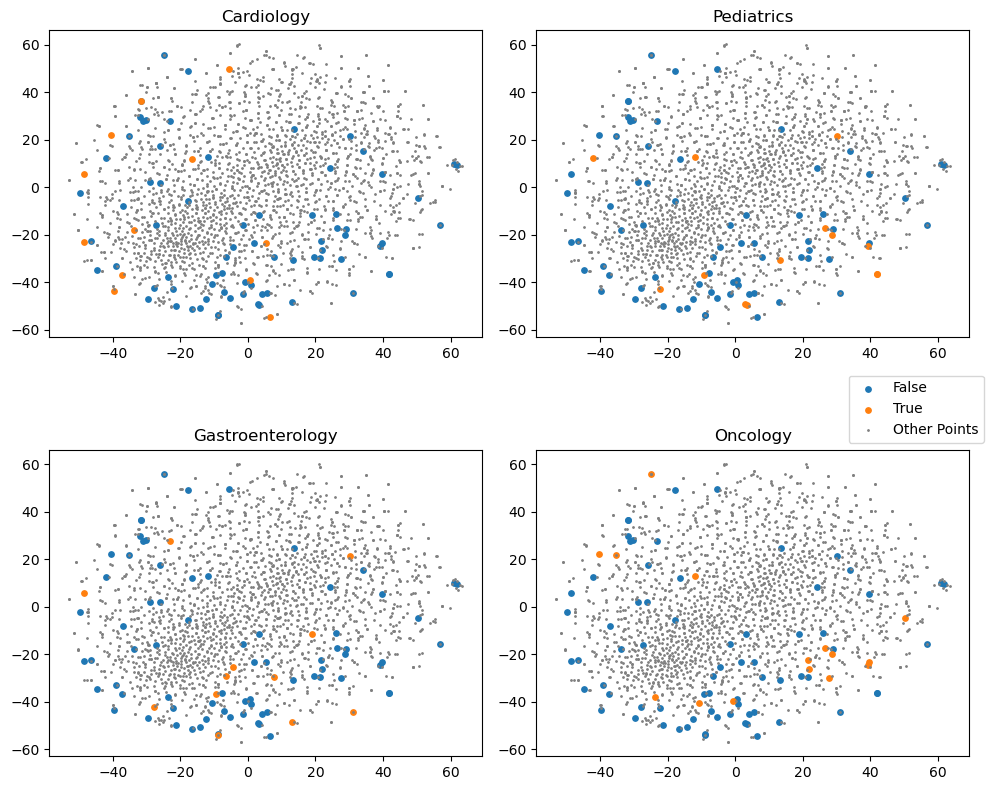

           False  True  Other
labelsDic                    
0.0           20     2    323
1.0           44    12    199
2.0            7     1     64


In [281]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Cardiology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3[df1and3['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[0, 0].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

#axs[0, 0].scatter(x, y, c=colors, s=sizes, alpha=0.5)

axs[0, 0].set_title('Cardiology')    

indicesLayer3 = df1and3[df1and3['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[0, 0].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3.iloc[i,0]] = label

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Pediatrics'].unique():
    truth_data = df_E3C[df_E3C['Pediatrics'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3[df1and3['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[0, 1].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3[df1and3['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[0, 1].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[0, 1].set_title('Pediatrics')    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Gastroenterology'].unique():
    truth_data = df_E3C[df_E3C['Gastroenterology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3[df1and3['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[1, 0].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3[df1and3['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[1, 0].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[1, 0].set_title('Gastroenterology')    

    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)

#Pediatrics

import matplotlib.pyplot as plt

colormap = 'viridis'
etichetteDomain = {}
for truth in df_E3C['Oncology'].unique():
    truth_data = df_E3C[df_E3C['Oncology'] == truth]
    indices = truth_data['Unnamed: 0'].tolist()
    indicesLayer1 = df1and3[df1and3['Layer']=='Layer1']['Index']
    indicesOther = [index for index in indices if index in indicesLayer1]
    for indice in indicesOther:
        chiave = indice
        valore = truth 
        etichetteDomain[chiave] = valore
    axs[1, 1].scatter(embeddings_tsne1and3[indicesOther, 0], embeddings_tsne1and3[indicesOther, 1], s=15, label=truth)

indicesLayer3 = df1and3[df1and3['Layer']=='Layer3']['Index']
for indice in indicesLayer3:
    chiave = indice
    valore = truth 
    etichetteDomain[chiave] = 'Other'

axs[1, 1].scatter(embeddings_tsne1and3[indicesLayer3, 0], embeddings_tsne1and3[indicesLayer3, 1], s=1, color='grey', label='Other Points')
axs[1, 1].set_title('Oncology')    

plt.gcf().set_size_inches(10, 8)  # Imposta le dimensioni della figura
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/domainLabelsChatGPTdoc2vec.svg')
plt.savefig('immagini\domainLabelsChatGPTdoc2vec.eps')
plt.show()

labelsDic = {}
for i, label in enumerate(clustersHierarchicalInfoGraph):
    labelsDic[df1and3.iloc[i,0]] = label

#Ho create due dizionari (labelsDic e EtichetteDomain) per vedere per ogni indice sia la label che il valore di verità dato da chatgpt sull'appartenenza al domain, vediamo quindi quanti true, false e other sono con quali cluster.

dfCardiology = pd.DataFrame({'etichetteDomain': etichetteDomain, 'labelsDic': labelsDic})

# Raggruppamento e conteggio dei documenti per combinazione di etichette e valori
tabella = dfCardiology.groupby(['labelsDic', 'etichetteDomain']).size().unstack(fill_value=0)

# Rinominazione delle colonne per chiarezza
tabella.columns = ['False', 'True','Other' ]

print(tabella)